#**Проект:** Линейные модели в машинном обучении

**Описание проекта:**    
Для клиента IT-компании фермера "Экофермы" необходимо разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке коров.  Фермер хочет, чтобы каждая бурёнка в его стаде давала не менее 6000 килограммов молока в год, а её надой был вкусным.

**Цель исследования** :  
На основе данных об уже имеющихся коровах на "Экоферме" нужно создать 2 прогнозные модели для отбора коров в поголовье:   
-  Первая будет прогнозировать возможный удой (целевой признак — Удой);
- Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак — Вкус молока).  

С помощью модели нужно отобрать коров по двум критериям:  
- Средний удой за год — не менее 6000 килограммов.  
- Молоко должно быть вкусным.

# Шаг 1. Загрузка данных

##1.1. Импортируем необходимые библиотеки и функции, а также модели для обучения и

In [ ]:
import pandas as pd
#импортируем необходимые для проведения стат. анализа библиотеки
pd.options.display.float_format = '{:,.3f}'.format

#импортируем библиотеку для построения графиков
import matplotlib.pyplot as plt

#импортируем библиотеку для построения более сложных графиков
import seaborn as sns

#импортируем библиотеку для работы с многомерными массивами
import numpy as np
import seaborn as sns

#импортируем библиотеку проведения статистического анализа (проведения стат. тестов и получения оценок рез-тов)
from scipy import stats as st

#функция для разделения данных
from sklearn.model_selection import train_test_split


# создание константы RANDOM_STATE
RANDOM_STATE = 42

#импортируем из библиотеки sklearn модели линейной и логистической регрессии соответственно
from sklearn.linear_model import LinearRegression, LogisticRegression

#импортируем из библиотеки sklearn функции для оценки моделей машинного обучения.
from sklearn.metrics import (mean_absolute_error, confusion_matrix, accuracy_score, f1_score, r2_score, recall_score, roc_auc_score,
                             mean_squared_error, root_mean_squared_error, precision_score)
#импортируем из библиотеки sklearn функцию для кодирования категориальные переменные как двоичных векторов и как как целые числа, для
#стандартизации набора данных.
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.utils import resample


##1.2. Считываем данные

In [ ]:
#считываю файлы с данными и записываю датасеты в соответствующие переменные
try:
    general = pd.read_csv('ferma_main.csv', engine = 'python', sep = ';')
except:
#данные о стаде фермера на текущий момент
    general = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_main.csv', sep = ';')
try:
    dad = pd.read_csv('ferma_dad.csv', engine = 'python', sep = ';')
except:
# данные об имени папы каждой коровы в стаде фермера
    dad = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_dad.csv', sep = ';')
try:
    new_cow = pd.read_csv('cow_buy.csv', engine = 'python', sep = ';')
except:
# данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой
    new_cow = pd.read_csv('https://code.s3.yandex.net/datasets/cow_buy.csv', sep = ';')

##1.3. Изучим общую информацию о данных в трех датасетах

In [ ]:
general.info()
display (general.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [ ]:
dad.info()
display (dad.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [ ]:
new_cow.info()
display (new_cow.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


In [ ]:
#Переименуем столбцы датасетов для удобства дальнейшей работы с данными
general = general.rename(columns={'порода папы_быка': 'dad_bull_breed', 'Удой, кг': 'milk_yield_kg', 'Порода': 'breed','Возраст': 'age',
                                  'ЭКЕ (Энергетическая кормовая единица)': 'energy_feed_unit', 'СПО (Сахаро-протеиновое соотношение)':
                                  'sugar_protein_ratio','Сырой протеин, г': 'raw_protein_g', 'Тип пастбища': 'pasture', 'Жирность,%':
                                  'fat_%','Белок,%': 'protein_%', 'Вкус молока': 'taste'})

dad = dad.rename(columns={'Имя Папы': 'dad_name'})
new_cow = new_cow.rename(columns={'Порода':'breed','Тип пастбища':'pasture','порода папы_быка':'dad_bull_breed','Имя_папы':'dad_name',
                                  'Текущая_жирность,%': 'fat_%',	'Текущий_уровень_белок,%': 'protein_%',
                                  'Возраст': 'age'})


general.info()
dad.info()
new_cow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   634 non-null    int64 
 1   milk_yield_kg        634 non-null    int64 
 2   energy_feed_unit     634 non-null    object
 3   raw_protein_g        634 non-null    int64 
 4   sugar_protein_ratio  634 non-null    object
 5   breed                634 non-null    object
 6   pasture              634 non-null    object
 7   dad_bull_breed       634 non-null    object
 8   fat_%                634 non-null    object
 9   protein_%            634 non-null    object
 10  taste                634 non-null    object
 11  age                  634 non-null    object
dtypes: int64(3), object(9)
memory usage: 59.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    -

##**Выводы:**  
Данные, которые были предоставлены для работы над проектом были загружены в три датасета:  
- В перый датасет - основная таблица с информацией о коровах Экоферы, их питании, молоке и пастбище.  
- Во второй датасет - данные об отцах коров Экофермы.  
- В третий датасет - данные о коровах, которых фермер рассматривает для покупки.  

Для удобства работы с данными таблиц были изменены их заголовки.   
При первичном осмотре пропуски в данных не обнаружены.    
Обнаружено, что некоторые типы данных имеет неверный тип и формат представления не в стандартах python.   


#Шаг 2. Предобработка данных




In [ ]:
#Проверим наличие явных дубликатов в основном датафрейме
general.duplicated().sum()

5

In [ ]:
#удалим, найденные дубликаты в датасете
general.drop_duplicates(inplace=True)
#проверим, остались ли дубликаты
general.duplicated().sum()

0

In [ ]:
#изменим тип данных в столбцах с плавающей точкой на float во всех таблицах
general['fat_%']  = general['fat_%'].str.replace(',', '.')
general['fat_%'] = general['fat_%'].astype(float)

general['protein_%']  = general['protein_%'].str.replace(',', '.')
general['protein_%'] = general['protein_%'].astype(float)

general['sugar_protein_ratio']  = general['sugar_protein_ratio'].str.replace(',', '.')
general['sugar_protein_ratio'] = general['sugar_protein_ratio'].astype(float)

general['energy_feed_unit']  = general['energy_feed_unit'].str.replace(',', '.')
general['energy_feed_unit'] = general['energy_feed_unit'].astype(float)

new_cow['fat_%'] = new_cow['fat_%'].str.replace(',', '.')
new_cow['fat_%'] = new_cow['fat_%'].astype(float)

new_cow['protein_%'] = new_cow['protein_%'].str.replace(',', '.')
new_cow['protein_%'] = new_cow['protein_%'].astype(float)

In [ ]:
#проверим данные в трех датасетах на неявные дубликаты
display (general['breed'].value_counts())
display (general['age'].value_counts())
display (general['pasture'].value_counts())
display (general['taste'].value_counts())
display (general['dad_bull_breed'].value_counts())
display (general['sugar_protein_ratio'].value_counts())

display (new_cow['dad_name'].value_counts())
display (new_cow['pasture'].value_counts())
display (new_cow['age'].value_counts())
display (dad['dad_name'].value_counts())

,count
breed,
Вис Бик Айдиал,373
РефлешнСоверинг,256


,count
age,
более_2_лет,519
менее_2_лет,110


,count
pasture,
Холмистое,351
Равнинное,253
Равнинные,25


,count
taste,
вкусно,371
не вкусно,258


,count
dad_bull_breed,
Соверин,311
Айдиал,240
Айдиалл,78


,count
sugar_protein_ratio,
0.940,172
0.930,141
0.890,94
0.880,58
0.950,55
0.840,25
0.860,25
0.895,23
0.850,17


,count
dad_name,
Буйный,8
Геркулес,6
Барин,4
Соловчик,2


,count
pasture,
равнинное,11
холмистое,9


,count
age,
более_2_лет,15
менее_2_лет,5


,count
dad_name,
Барин,240
Буйный,215
Соловчик,110
Геркулес,64


Найдены неявные дубликаты в категориальных данных: тип пастбища, имя отца коровы. Устраним дубликаты, заменив некорректные значения на верные.

In [ ]:
general['dad_bull_breed'] = (general['dad_bull_breed'].str.replace('Айдиалл', 'Айдиал'))
general['pasture'] = (general['pasture'].str.replace('Равнинные', 'Равнинное'))
display (general['pasture'].value_counts())
general['pasture'] = general['pasture'].str.lower()
new_cow['pasture'] = new_cow['pasture'].str.lower()

display (general['dad_bull_breed'].value_counts())

,count
pasture,
Холмистое,351
Равнинное,278


,count
dad_bull_breed,
Айдиал,318
Соверин,311


Сгруппируем данные основной таблицы по: данным о коровах, о питании, о пастбище и о молоке.

In [ ]:
# сделаем группировиз общей таблицы три новые
#данные о коровах
info_cow = general.drop(columns=['milk_yield_kg', 'energy_feed_unit', 'raw_protein_g', 'sugar_protein_ratio', 'pasture', 'fat_%',
                        'protein_%', 'taste'])
#данные о пастбище
info_pasture =  general['pasture']

#данные о питании коров
info_food = general.drop(columns=['milk_yield_kg', 'pasture', 'id', 'dad_bull_breed', 'age', 'breed', 'fat_%','protein_%', 'taste'])

#данные о молоке коров
info_milk = general.drop(columns=['pasture', 'id', 'dad_bull_breed', 'age', 'breed', 'sugar_protein_ratio',
'raw_protein_g', 'energy_feed_unit'])

# проверим, получившиеся таблицы
display(info_cow.head())
display(info_pasture.head())
display(info_food.head())
display(info_milk.head())

,id,breed,dad_bull_breed,age
0,1,Вис Бик Айдиал,Айдиал,более_2_лет
1,2,Вис Бик Айдиал,Соверин,менее_2_лет
2,3,РефлешнСоверинг,Соверин,более_2_лет
3,4,РефлешнСоверинг,Айдиал,более_2_лет
4,5,Вис Бик Айдиал,Соверин,менее_2_лет


,pasture
0,равнинное
1,равнинное
2,холмистое
3,холмистое
4,равнинное


,energy_feed_unit,raw_protein_g,sugar_protein_ratio
0,14.200,1743,0.890
1,12.800,2138,0.890
2,14.000,1854,0.885
3,12.400,2012,0.885
4,12.800,1675,0.885


,milk_yield_kg,fat_%,protein_%,taste
0,5863,3.580,3.076,вкусно
1,5529,3.540,3.079,вкусно
2,5810,3.590,3.074,не вкусно
3,5895,3.400,3.075,не вкусно
4,5302,3.730,3.073,вкусно


In [ ]:
info_cow.info()
display (info_cow.head())

<class 'pandas.core.frame.DataFrame'>
Index: 629 entries, 0 to 628
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              629 non-null    int64 
 1   breed           629 non-null    object
 2   dad_bull_breed  629 non-null    object
 3   age             629 non-null    object
dtypes: int64(1), object(3)
memory usage: 24.6+ KB


,id,breed,dad_bull_breed,age
0,1,Вис Бик Айдиал,Айдиал,более_2_лет
1,2,Вис Бик Айдиал,Соверин,менее_2_лет
2,3,РефлешнСоверинг,Соверин,более_2_лет
3,4,РефлешнСоверинг,Айдиал,более_2_лет
4,5,Вис Бик Айдиал,Соверин,менее_2_лет


##Выводы:   
В ходе преварительной обработки данных:  
- были найдены и удалены явные дубликаты в датафрейме general.  
- был скорректирован формат записи данных с плавающей точкой и изменен тип данных в этих столбцах на float, чтобы было удобнее работать с числовыми данными в дальнейшем.  
- были найдены и устранены неявные дубликаты в именах отцов коров и в типе пасбища.  
- данные основной таблицы были сгруппированы и получены 4 отдельные таблицы с данными о коравах, об их питании, о пастбище и молоке.  

#Шаг 3. Исследовательский анализ данных

In [ ]:
#Добавим столбец, в котором определяется, что средний удой от коровы за год — не менее 6000 килограммов;
general['milk_yield_6000kg'] = np.where(general['milk_yield_kg'] >= 6000, 1, 0)
display(general['milk_yield_6000kg'].value_counts())

,count
milk_yield_6000kg,
1,371
0,258


## 3.1. Проведите статистический анализ всех признаков.  




,milk_yield_kg
count,629.000
mean,"6,188.750"
std,"1,644.795"
min,"5,204.000"
25%,"5,751.000"
50%,"6,133.000"
75%,"6,501.000"
max,"45,616.000"


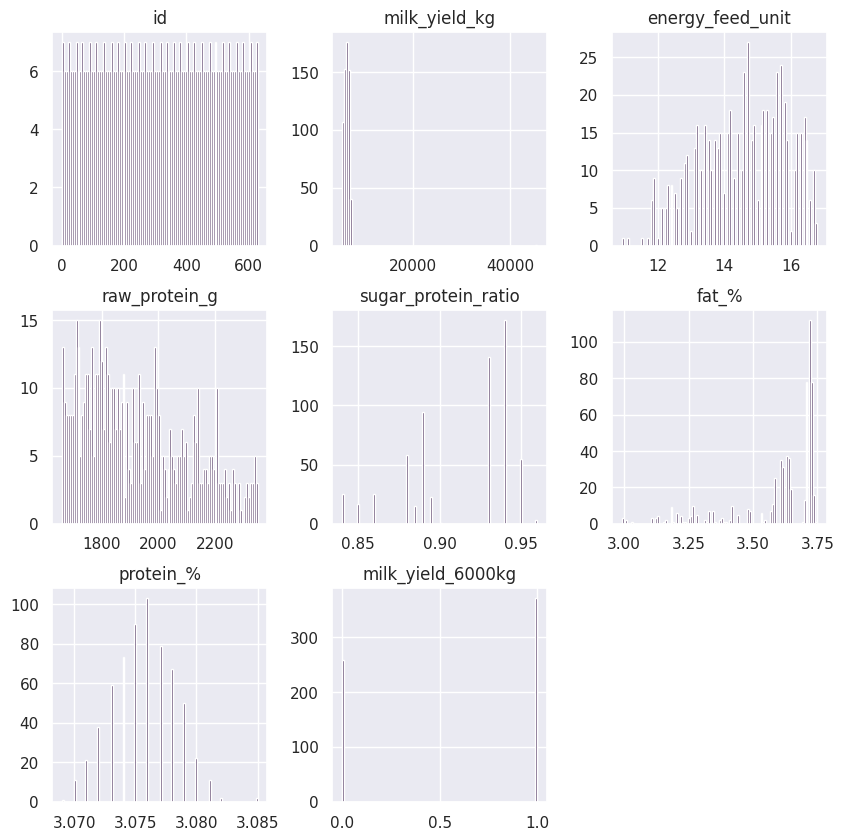

In [ ]:
general.hist(figsize=(10, 10), color = '#543964', bins = 100);
general['milk_yield_kg'].describe()

In [ ]:
general['fat_%'].describe()

,fat_%
count,629.000
mean,3.604
std,0.169
min,2.990
25%,3.590
50%,3.650
75%,3.720
max,3.750


In [ ]:
general['protein_%'].describe()

,protein_%
count,629.000
mean,3.076
std,0.003
min,3.069
25%,3.074
50%,3.076
75%,3.077
max,3.085


По данным гистограммы можно увидеть, что   
- в графике по Удою есть выброс - это макс. значение.  
- график распределения содержания Белка распределен нормально, выбросов нет.
- в графике распределения Жирности видны выбросы. График скошен влево, значения < 3.5 -аномальны.

## 3.2. Построим графики для каждого признака.  

Построим графики размаха, чтобы более четко увидеть выбросы (для количественных значений).

<ipython-input-214-ce8878e77fd2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  (sns.boxplot(data = general, y = 'milk_yield_kg', x='taste', palette="bright")


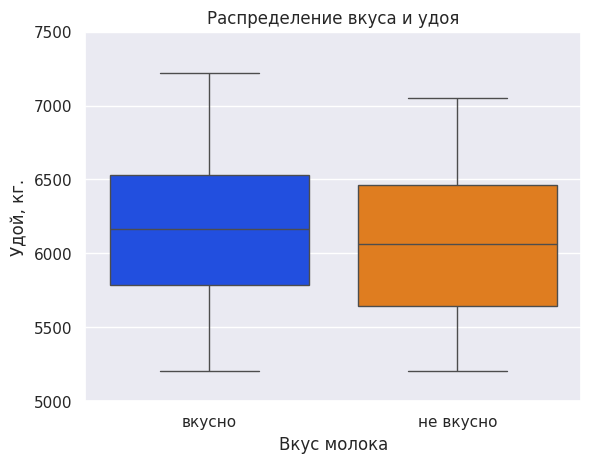

In [ ]:
#построим график размаха с разбивкрй по вкусу молока, чтобы выявить выбросы/аномалии
(sns.boxplot(data = general, y = 'milk_yield_kg', x='taste', palette="bright")
    .set(title = 'Распределение вкуса и удоя', xlabel = 'Вкус молока', ylabel = 'Удой, кг.', ylim=(5000, 7500)));
plt.ylim(5000, 7500)
plt.show();

Выбросов нет.

<ipython-input-215-0f341bb10963>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  (sns.boxplot(data = general, y = 'fat_%', x='taste', palette="bright")


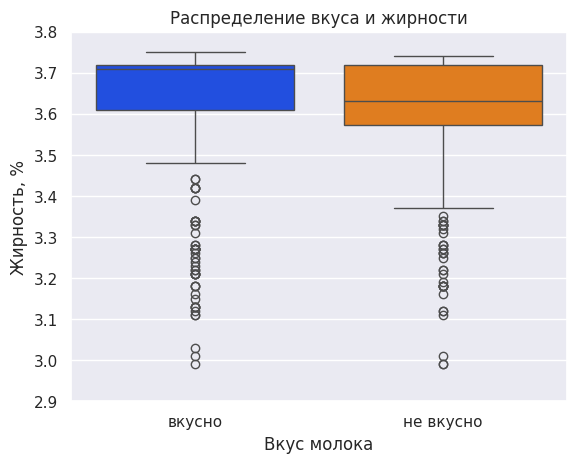

In [ ]:
#построим график размаха с разбивкрй по вкусу молока, чтобы выявить выбросы/аномалии
(sns.boxplot(data = general, y = 'fat_%', x='taste', palette="bright")
    .set(title = 'Распределение вкуса и жирности', xlabel = 'Вкус молока', ylabel = 'Жирность, %',  ylim=(2.9, 3.8)))
plt.ylim(2.9, 3.8)
plt.show()

Выбросы есть:  
- для вкуса "вкусно" менее 3.45.   
- для вкуса "не вкусно" менее 3.35

<ipython-input-216-e699e650fbd7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  (sns.boxplot(data = general, y = 'protein_%', x='taste', palette="bright")


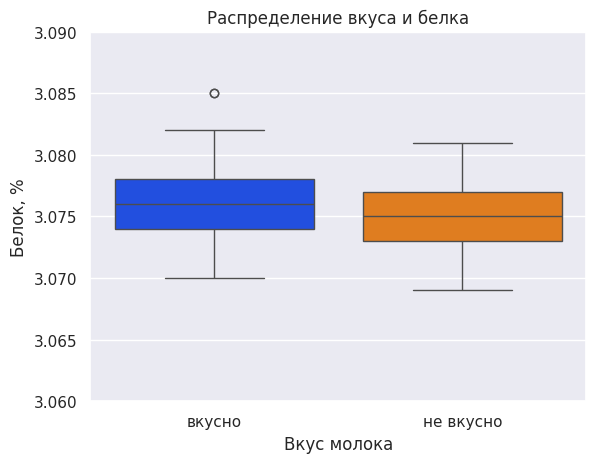

In [ ]:
#построим график размаха с разбивкрй по вкусу молока, чтобы выявить выбросы/аномалии
(sns.boxplot(data = general, y = 'protein_%', x='taste', palette="bright")
    .set(title = 'Распределение вкуса и белка', xlabel = 'Вкус молока', ylabel = 'Белок, %',  ylim=(3.06, 3.09)))
plt.ylim(3.06, 3.09)
plt.show()

Выброс один, во вкусе "вкусно" - максимальное значение.

<ipython-input-217-53252ac9f09f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  (sns.boxplot(data = general, y = 'energy_feed_unit', x='taste', palette="bright")


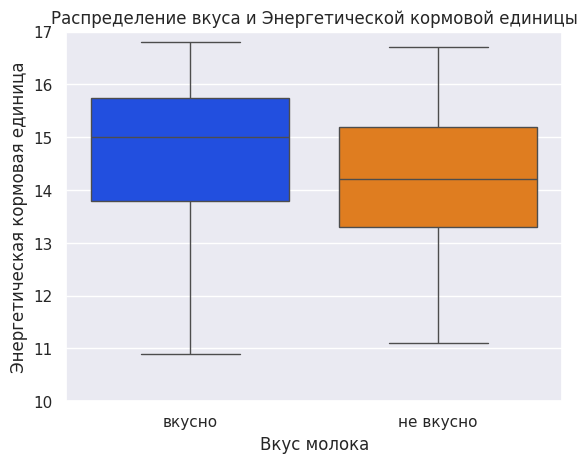

In [ ]:
#построим график размаха с разбивкрй по вкусу молока, чтобы выявить выбросы/аномалии
(sns.boxplot(data = general, y = 'energy_feed_unit', x='taste', palette="bright")
    .set(title = 'Распределение вкуса и Энергетической кормовой единицы',
         xlabel = 'Вкус молока', ylabel = 'Энергетическая кормовая единица',  ylim=(10, 17)))
plt.ylim(10, 17)
plt.show()

<ipython-input-218-00df2fbac312>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  (sns.boxplot(data = general, y = 'sugar_protein_ratio', x='taste', palette="bright")


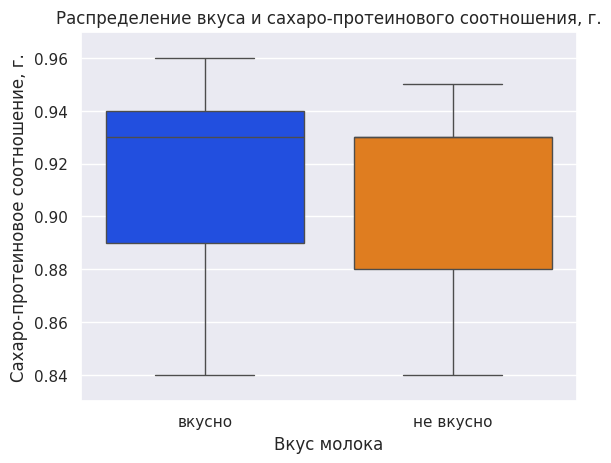

In [ ]:
#построим график размаха с разбивкрй по вкусу молока, чтобы выявить выбросы/аномалии
(sns.boxplot(data = general, y = 'sugar_protein_ratio', x='taste', palette="bright")
    .set(title = 'Распределение вкуса и сахаро-протеинового соотношения, г.', xlabel = 'Вкус молока',
         ylabel = 'Сахаро-протеиновое соотношение, г.',  ylim=(0.83, 0.97)))
plt.ylim(0.83, 0.97)
plt.show()

<ipython-input-219-0c448478433f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  (sns.boxplot(data = general, y = 'raw_protein_g', x='taste', palette="bright")


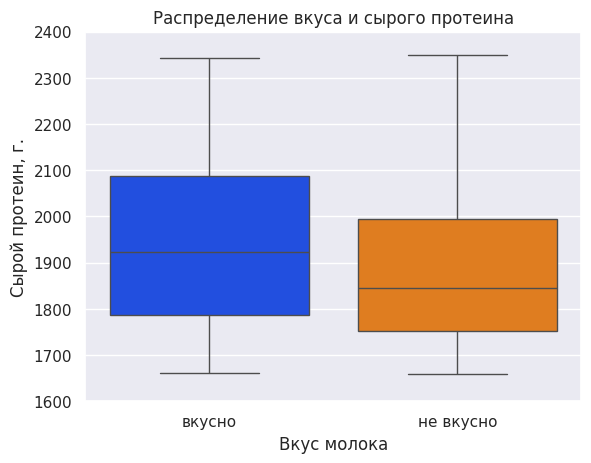

In [ ]:
#построим график размаха с разбивкрй по вкусу молока, чтобы выявить выбросы/аномалии
(sns.boxplot(data = general, y = 'raw_protein_g', x='taste', palette="bright")
    .set(title = 'Распределение вкуса и сырого протеина', xlabel = 'Вкус молока',
         ylabel = 'Сырой протеин, г.',  ylim=(1600, 2400)))
plt.ylim(1600, 2400)
plt.show()

Удалим аномалии в данных в таблице по значению белок.   


In [ ]:
#устраним аномалии
#заменим выброс на медианное значение белка
#general['protein_%'] = general['protein_%'].drop(general[general['protein_%'] == 3.085].index)

general.loc[general['protein_%'] == 3.085, 'protein_%'] = general['protein_%'].median()
general['protein_%'].describe()

,protein_%
count,629.000
mean,3.076
std,0.002
min,3.069
25%,3.074
50%,3.076
75%,3.077
max,3.082


In [ ]:
#скорректируем аномалии
#на медианнон=е значение удоя
#general['milk_yield_kg'] = general['milk_yield_kg'].drop(general[general['milk_yield_kg'] > 45000].index)
#general.loc[general.milk_yield_kg > 45000,['milk_yield_kg']] = general.loc[general.milk_yield_kg >45000,['milk_yield_kg']].median()
general.loc[general['milk_yield_kg'] > 45000, 'milk_yield_kg'] = general['milk_yield_kg'].median()

#general['milk_yield_kg'] = np.where(general['milk_yield_kg'] > 45000, general['milk_yield_kg'].median(), general['milk_yield_kg'])
#general[general.milk_yield_kg > 45000] = general[(general.milk_yield_kg > 45000)].milk_yield_kg.median()
general['milk_yield_kg'].describe()
general.info()

<class 'pandas.core.frame.DataFrame'>
Index: 629 entries, 0 to 628
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   629 non-null    int64  
 1   milk_yield_kg        629 non-null    int64  
 2   energy_feed_unit     629 non-null    float64
 3   raw_protein_g        629 non-null    int64  
 4   sugar_protein_ratio  629 non-null    float64
 5   breed                629 non-null    object 
 6   pasture              629 non-null    object 
 7   dad_bull_breed       629 non-null    object 
 8   fat_%                629 non-null    float64
 9   protein_%            629 non-null    float64
 10  taste                629 non-null    object 
 11  age                  629 non-null    object 
 12  milk_yield_6000kg    629 non-null    int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 68.8+ KB


<ipython-input-222-d2deff224eee>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  (sns.boxplot(data = general, y = 'fat_%', x='taste', palette="bright")


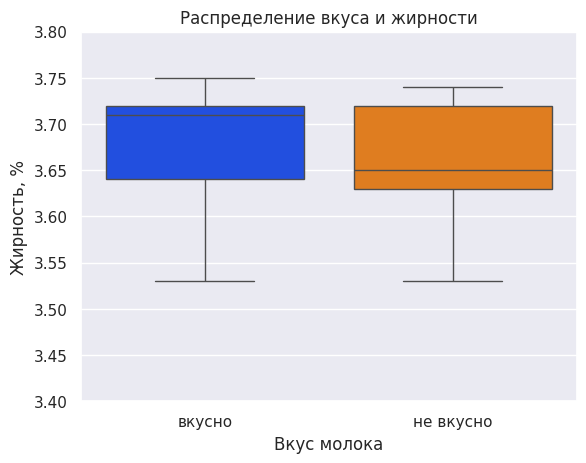

In [ ]:
#заменим аномалии на медианные значения
#выбросы - значения менее 3.5%
#general['fat_%'] = general['fat_%'].drop(general[general['fat_%'] < 3.46].index)
general.loc[general['fat_%'] < 3.5, 'fat_%'] = general['fat_%'].median()

#general.loc[general.fat_% < 3.46,['fat_%']] = general.loc[general.fat_% < 3.46,['fat_%']].median()

#general['fat_%'] = general['fat_%'].drop(general[(general['taste'] == 'вкусно') & (general['fat_%'] < 3.5)].index)
#general['fat_'] = np.where(general['fat_%'] < 3.5 and ['taste'] == 'вкусно', general['fat_%'].median(), general['fat_%'])
#general.loc[general.fat_% < 3.46,['fat_%']] = general.loc[general.fat_% < 3.46,['fat_%']].median()


general['fat_%'].describe()

(sns.boxplot(data = general, y = 'fat_%', x='taste', palette="bright")
    .set(title = 'Распределение вкуса и жирности', xlabel = 'Вкус молока', ylabel = 'Жирность, %',  ylim=(3.4, 3.8)));

plt.show();

По данным графиков видим, что

Построим круговые диаграммы для качественных данных

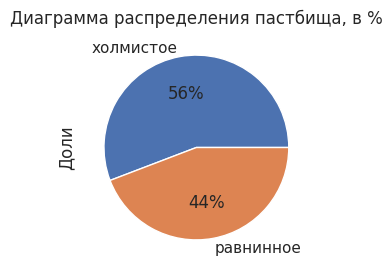

In [ ]:
#построим круговую диаграмму распределения типа пастбища
general['pasture'].value_counts().plot(kind = 'pie', y = general['pasture'].value_counts(),
                                  autopct = '%1.0f%%', figsize=(3,3), ylabel = 'Доли',
                                  title = 'Диаграмма распределения пастбища, в %');

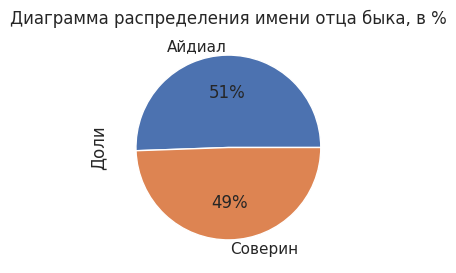

In [ ]:
#построим круговую диаграмму распределения имени отца быка
general['dad_bull_breed'].value_counts().plot(kind = 'pie', y = general['dad_bull_breed'].value_counts(),
                                  autopct = '%1.0f%%', figsize=(3,3), ylabel = 'Доли',
                                  title = 'Диаграмма распределения имени отца быка, в %');

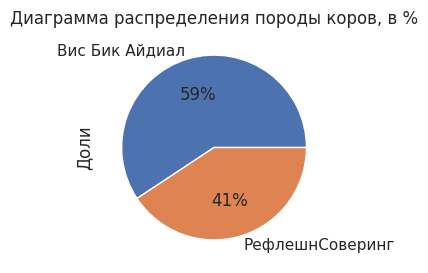

In [ ]:
#построим круговую диаграмму распределения породы коров
general['breed'].value_counts().plot(kind = 'pie', y = general['breed'].value_counts(),
                                  autopct = '%1.0f%%', figsize=(3,3), ylabel = 'Доли',
                                  title = 'Диаграмма распределения породы коров, в %');

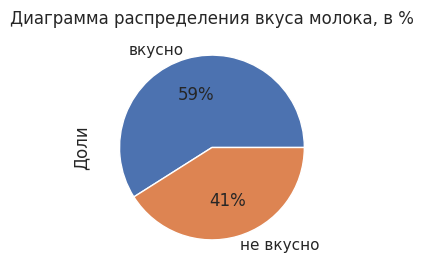

In [ ]:
#построим круговую диаграмму распределения вкуса молока
general['taste'].value_counts().plot(kind = 'pie', y = general['taste'].value_counts(),
                                  autopct = '%1.0f%%', figsize=(3,3), ylabel = 'Доли',
                                  title = 'Диаграмма распределения вкуса молока, в %');

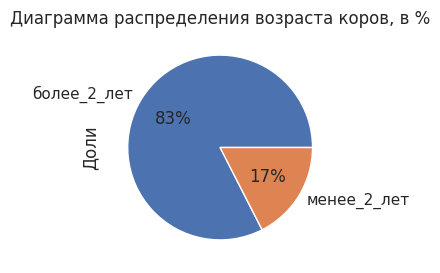

In [ ]:
#строим круговую диаграмму распределения возраста коров
general['age'].value_counts().plot(kind = 'pie', y = general['age'].value_counts(),
                                  autopct = '%1.0f%%', figsize=(3,3), ylabel = 'Доли',
                                  title = 'Диаграмма распределения возраста коров, в %');

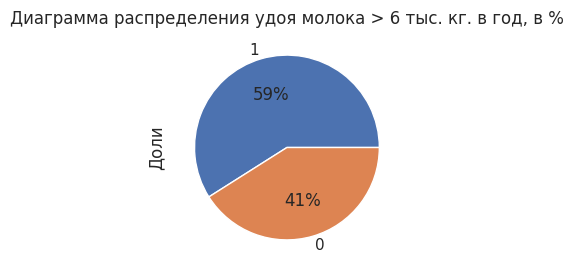

In [ ]:
#строим круговую диаграмму распределения удоя молока более 6 тыс. кг. в год
general['milk_yield_6000kg'].value_counts().plot(kind = 'pie', y = general['milk_yield_6000kg'].value_counts(),
                                  autopct = '%1.0f%%', figsize=(3,3), ylabel = 'Доли',
                                  title = 'Диаграмма распределения удоя молока > 6 тыс. кг. в год, в %');

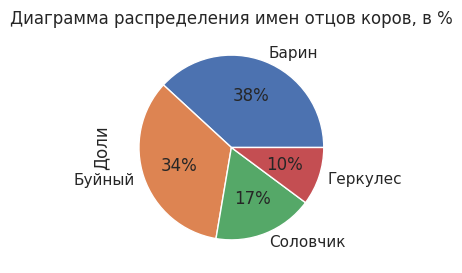

In [ ]:
#строим круговую диаграмму распределения имен отцов коров
dad['dad_name'].value_counts().plot(kind = 'pie', y = dad['dad_name'].value_counts(),
                                  autopct = '%1.0f%%', figsize=(3,3), ylabel = 'Доли',
                                  title = 'Диаграмма распределения имен отцов коров, в %');

In [ ]:
# сделаем группировку в общей таблице по удою и вкусу молока в новый датасет
taste_milk = general.groupby(['taste']).agg(energy_feed_unit = ('energy_feed_unit', 'mean'),
                                                  raw_protein_g = ('raw_protein_g', 'mean'),
                                                  sugar_protein_ratio = ('sugar_protein_ratio', 'mean'),
                                                  fat = ('fat_%', 'mean'),
                                                  protein = ('protein_%', 'mean'))
#проверим, получившуюся таблицу

display(taste_milk)

,energy_feed_unit,raw_protein_g,sugar_protein_ratio,fat,protein
taste,,,,,
вкусно,14.773,"1,945.698",0.918,3.677,3.076
не вкусно,14.215,"1,891.248",0.906,3.665,3.075


In [ ]:
# сделаем группировку в общей таблице по удою и вкусу молока в новый датасет
milk_yield = general.groupby(['milk_yield_6000kg']).agg(energy_feed_unit = ('energy_feed_unit', 'mean'),
                                                  raw_protein_g = ('raw_protein_g', 'mean'),
                                                  sugar_protein_ratio = ('sugar_protein_ratio', 'mean'),
                                                  fat = ('fat_%', 'mean'),
                                                  protein = ('protein_%', 'mean'))
#проверим, получившуюся таблицу
display(milk_yield)

,energy_feed_unit,raw_protein_g,sugar_protein_ratio,fat,protein
milk_yield_6000kg,,,,,
0,13.434,"1,832.225",0.878,3.631,3.075
1,15.315,"1,986.744",0.938,3.700,3.076


**Выводы:**

**Тип пастбища **: 56 % коров пасутся на холмистом пастище, 44% - на равнинном.  

**Порода папы быка**:  почти у половины коров порода отца Соверин 51%, у 49% - Айдиал.  

**Порода**:  больше половины коров 59% породы Вис Бик Айдиал, 41% -РефлешнСоверин.

**Вкус молока **: у 59% коров молоко вкусное, у 41% - не вкусное.  

**Возраст**:  более 82% коровы старше двух лет.  

**Удой больше 6000кг в год**: у 59% коров удой выше 6000кг, у 41% - ниже.  

**Имена отцов быка **:  Чаще всего отцами коров становились быки с именами Барин 38% и Буйный 34%. Геркулес в 17% случаев, а Соловчик в 10%.

##3.3.Выводы о данных:  
- Есть ли вы выбросы, необычное распределение количественных признаков или другие особенности:  
Выбросы - в распределении жирности молока, белка и в максимольном значении Удоя.    
В целевых признаках отмечается неравномерное распределение, почти на 9% выше коров с признаком "вкусное молоко" и с Удоем выше 6000 кг в год. Обучение модели на такой выборке может привести к тому, что у нее не хватит данных чтобы лучше определять "не вкусное" молоко у коров и коров с Удоем - менее 6 000 кг в год.

- Как были улучшены данные.  
Выбросы были найдены и устранены, данные очищены.

#Шаг 4. Проведем корреляционный анализ признаков в датасете general


## 4.1. Изучим взаимосвязь между признаками: рассчитаем коэффициенты корреляции между всеми признаками.

In [ ]:
#посчитаем корреляцию Пирсона для всех числовых значений
display ('Кореляция Пирсона между energy_feed_unit и raw_protein_g ',
         general['energy_feed_unit'].corr(general['raw_protein_g']))

display ('Кореляция Пирсона между energy_feed_unit и sugar_protein_ratio',
         general['energy_feed_unit'].corr(general['sugar_protein_ratio']))

display ('Кореляция Пирсона между energy_feed_unit и milk_yield_kg: ',
         general['energy_feed_unit'].corr(general['milk_yield_kg']))

display ('Кореляция Пирсона между energy_feed_unit и fat_%: ',
         general['energy_feed_unit'].corr(general['fat_%']))

display ('Кореляция Пирсона между energy_feed_unit и protein_%: ',
         general['energy_feed_unit'].corr(general['protein_%']))


display ('Кореляция Пирсона между raw_protein_g и milk_yield_kg',
         general['raw_protein_g'].corr(general['milk_yield_kg']))

display ('Кореляция Пирсона между raw_protein_g и sugar_protein_ratio',
         general['raw_protein_g'].corr(general['sugar_protein_ratio']))

display ('Кореляция Пирсона между raw_protein_g и fat_%',
         general['raw_protein_g'].corr(general['fat_%']))

display ('Кореляция Пирсона между raw_protein_g и protein_%',
         general['raw_protein_g'].corr(general['protein_%']))

display ('Кореляция Пирсона между milk_yield_kg и sugar_protein_ratio: ',
         general['milk_yield_kg'].corr(general['sugar_protein_ratio']))

display ('Кореляция Пирсона между milk_yield_kg и fat_%: ',
         general['milk_yield_kg'].corr(general['fat_%']))

display ('Кореляция Пирсона между milk_yield_kg и protein_%: ',
         general['milk_yield_kg'].corr(general['protein_%']))

display ('Кореляция Пирсона между fat_% и protein_% ',
         general['fat_%'].corr(general['protein_%']))

'Кореляция Пирсона между energy_feed_unit и raw_protein_g '

0.39066866904655306

'Кореляция Пирсона между energy_feed_unit и sugar_protein_ratio'

0.7436457694960138

'Кореляция Пирсона между energy_feed_unit и milk_yield_kg: '

0.7617233943871713

'Кореляция Пирсона между energy_feed_unit и fat_%: '

0.60165115173161

'Кореляция Пирсона между energy_feed_unit и protein_%: '

-0.00744159812160157

'Кореляция Пирсона между raw_protein_g и milk_yield_kg'

0.44604223162622975

'Кореляция Пирсона между raw_protein_g и sugar_protein_ratio'

0.4444429227978409

'Кореляция Пирсона между raw_protein_g и fat_%'

0.31832132005368446

'Кореляция Пирсона между raw_protein_g и protein_%'

0.22237575788796238

'Кореляция Пирсона между milk_yield_kg и sugar_protein_ratio: '

0.8061743529090196

'Кореляция Пирсона между milk_yield_kg и fat_%: '

0.6306942517669593

'Кореляция Пирсона между milk_yield_kg и protein_%: '

0.009680348334347604

'Кореляция Пирсона между fat_% и protein_% '

-0.023419141346719487

По данным корреляционного анализа видим, что есть сильная взаимосвязь между признаками:   

Очень высокая положительная зависимость между:  
- milk_yield_kg и energy_feed_unit  
- milk_yield_kg и sugar_protein_ratio  


Высокая положительная зависимость между:  
- milk_yield_kg и fat_%   
- energy_feed_unit и sugar_protein_ratio
- energy_feed_unit и fat_%  
  

Средняя положительная зависимость между:  
- milk_yield_kg и raw_protein_g  
- raw_protein_g и fat_%   
- raw_protein_g и sugar_protein_ratio  
- energy_feed_unit и raw_protein_g  
  
  
Слабая положительная и слабая отрицательная зависимость между:  
- milk_yield_kg и protein_%  
- raw_protein_g и protein_%  
- fat_% и protein_%
- energy_feed_unit и protein_%






Визуализируем значения матрицы корреляции между всеми числовыми параметрами датасета. Выделим колличественные признаки в отдельный датасет, чтобы посчитать корреляцию между ними.


,milk_yield_kg,energy_feed_unit,raw_protein_g,sugar_protein_ratio,fat_%,protein_%
milk_yield_kg,1.000,0.762,0.446,0.806,0.631,0.010
energy_feed_unit,0.762,1.000,0.391,0.744,0.602,-0.007
raw_protein_g,0.446,0.391,1.000,0.444,0.318,0.222
sugar_protein_ratio,0.806,0.744,0.444,1.000,0.616,0.093
fat_%,0.631,0.602,0.318,0.616,1.000,-0.023
protein_%,0.010,-0.007,0.222,0.093,-0.023,1.000


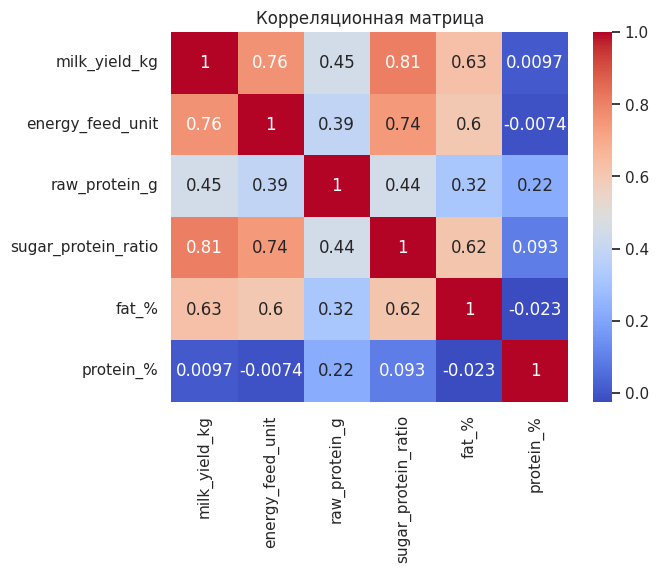

In [ ]:
cor_general = general.drop(['breed','pasture', 'dad_bull_breed', 'age', 'taste', 'milk_yield_6000kg', 'id'], axis=1).corr()
display(cor_general)

sns.heatmap(cor_general, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

По матрице корреляций видим сильную взаимосвязь между входными признаками energy_feed_unit и sugar_protein_ratio и fat_%



## 4.2. Построим диаграммы рассеяния scatterplot для признака Удой, кг и всех количественных признаков с учётом значения категориальных признаков.   
Пример: диаграмма рассеяния для Удой, кг и Сырой протеин, г, цвет точек диаграммы отображает признак Порода. Учитывайте, что виды связи в подгруппах могут различаться — например, для разных пород.


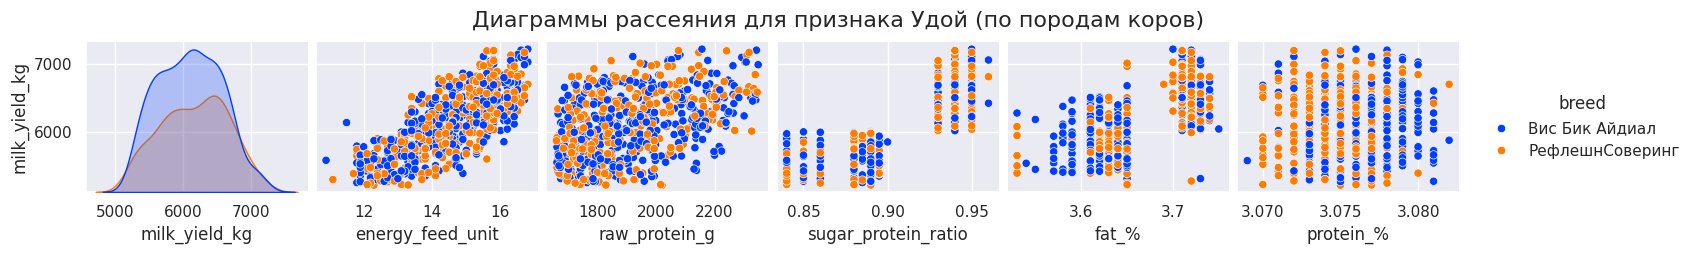

In [ ]:
#Удой с группировкой по породе коровы
milk_yield_breed = general.drop(['pasture', 'dad_bull_breed', 'age', 'taste', 'milk_yield_6000kg', 'id'], axis=1)
sns.pairplot(milk_yield_breed, y_vars=['milk_yield_kg'], hue = "breed", palette='bright').figure.suptitle("Диаграммы рассеяния для признака Удой (по породам коров)", fontsize=16)
plt.subplots_adjust(top=0.85)
#plt.show()

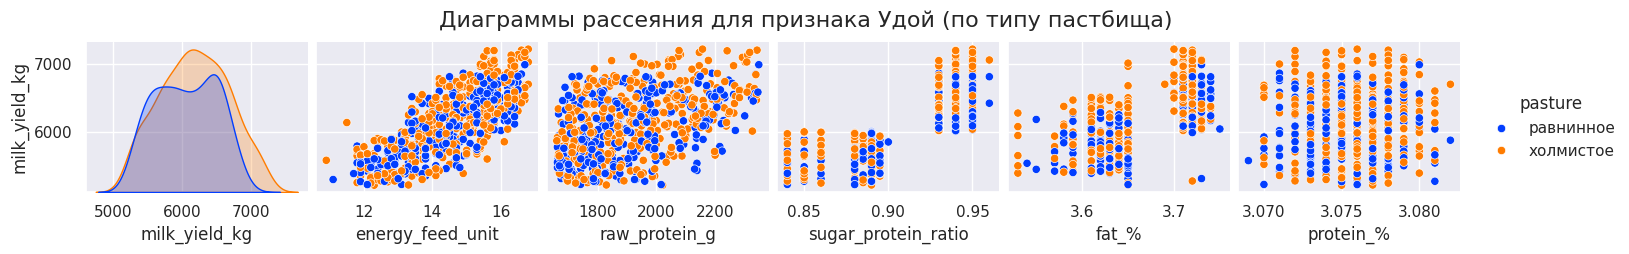

In [ ]:
#Удой с группировкой по пастбищу
milk_yield_pasture = general.drop(['breed', 'dad_bull_breed', 'age', 'taste', 'milk_yield_6000kg', 'id'], axis=1)
sns.pairplot(milk_yield_pasture, y_vars=['milk_yield_kg'], hue = "pasture", palette='bright').figure.suptitle("Диаграммы рассеяния для признака Удой (по типу пастбища)", fontsize=16)
plt.subplots_adjust(top=0.85)

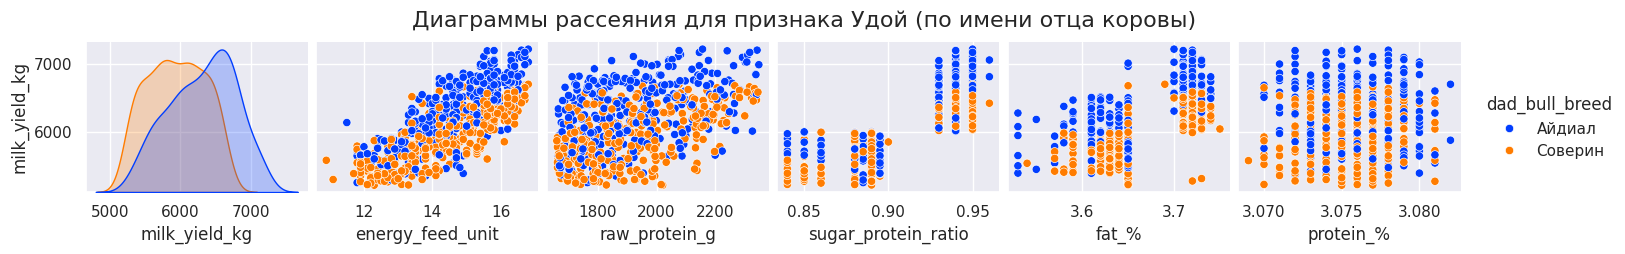

In [ ]:
#Удой с группировкой по имени отца коровы
milk_yield_dad_bull_breed = general.drop(['breed','pasture',  'age', 'taste', 'milk_yield_6000kg', 'id'], axis=1)
sns.pairplot(milk_yield_dad_bull_breed, y_vars=['milk_yield_kg'], hue = "dad_bull_breed", palette='bright').figure.suptitle("Диаграммы рассеяния для признака Удой (по имени отца коровы)", fontsize=16)
plt.subplots_adjust(top=0.85)

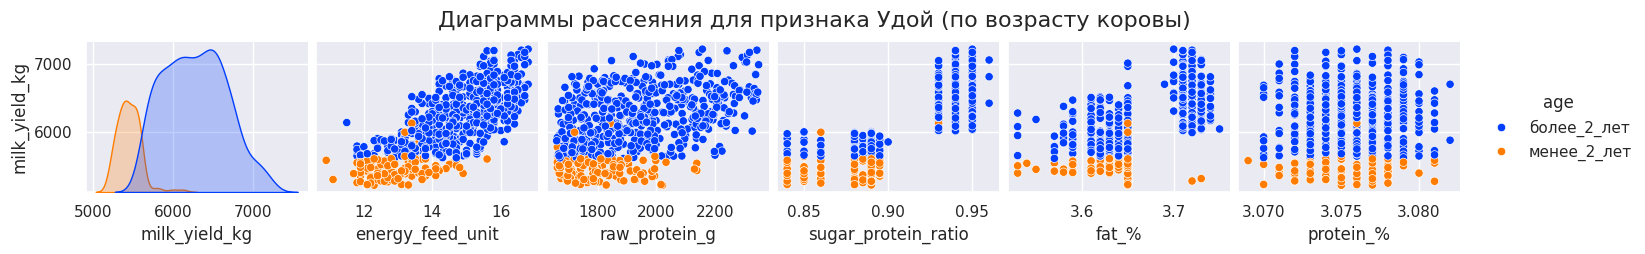

In [ ]:
#Удой с группировкой по возрасту
milk_yield_age = general.drop(['breed','pasture', 'dad_bull_breed',  'taste', 'milk_yield_6000kg', 'id'], axis=1)
sns.pairplot(milk_yield_age, y_vars=['milk_yield_kg'],
             hue = "age", palette='bright').figure.suptitle("Диаграммы рассеяния для признака Удой (по возрасту коровы)", fontsize=16)
plt.subplots_adjust(top=0.85)

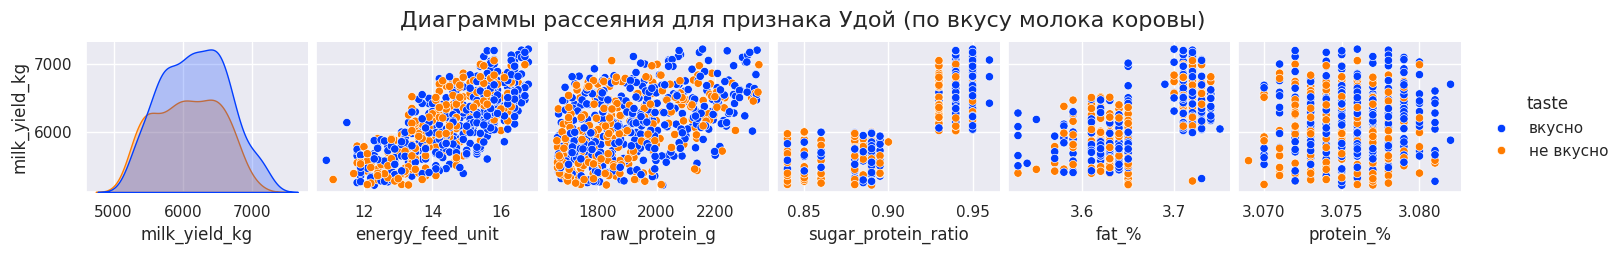

In [ ]:
#Удой с группировкой по вкусу
milk_yield_taste = general.drop(['breed','pasture', 'dad_bull_breed', 'age', 'milk_yield_6000kg', 'id'], axis=1)
sns.pairplot(milk_yield_taste, y_vars=['milk_yield_kg'],
             hue = "taste", palette='bright').figure.suptitle("Диаграммы рассеяния для признака Удой (по вкусу молока коровы)", fontsize=16)
plt.subplots_adjust(top=0.85)

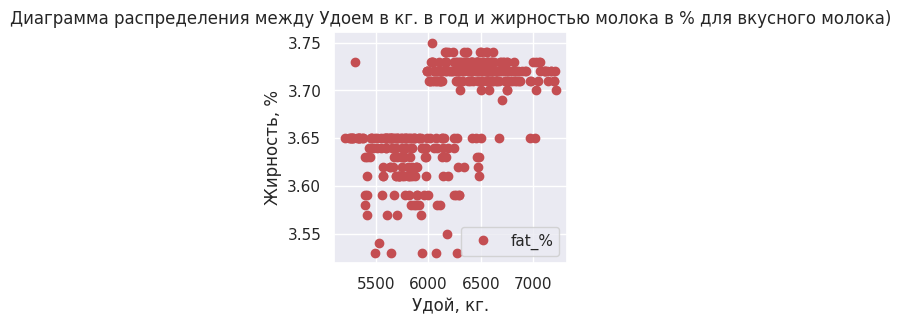

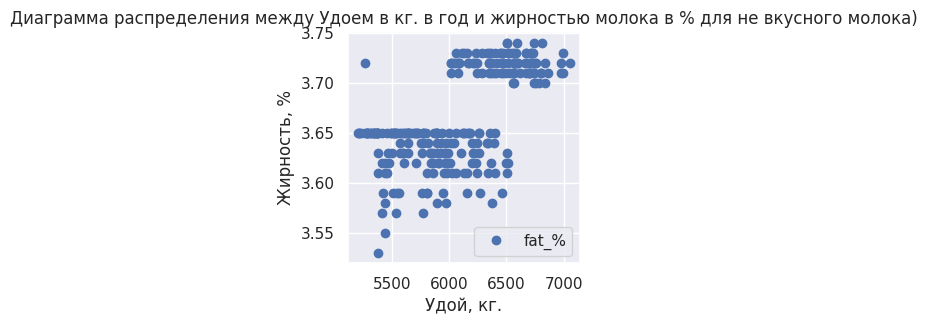

In [ ]:
#строим диаграмму рассеяния для визуализации взаимосвязи между двумя числовыми признаками с помощью точек,
#показывающих движение этих переменных вместе
general_taste = general.query("taste == 'вкусно'")
general_taste.plot(y = 'fat_%', x = 'milk_yield_kg', style = 'o', color = 'r', figsize=(3,3));
plt.title(f'Диаграмма распределения между Удоем в кг. в год и жирностью молока в % для вкусного молока)')
plt.xlabel('Удой, кг.')
plt.ylabel('Жирность, %');
plt.show();

general_not_taste  = general .query("taste == 'не вкусно'")
general_not_taste.plot(y = 'fat_%', x = 'milk_yield_kg', style = 'o', color = 'b', figsize=(3,3));
plt.title(f'Диаграмма распределения между Удоем в кг. в год и жирностью молока в % для не вкусного молока)')
plt.xlabel('Удой, кг.')
plt.ylabel('Жирность, %');
plt.show();

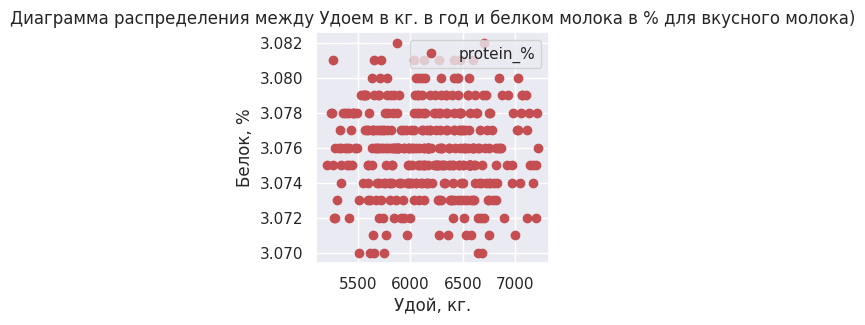

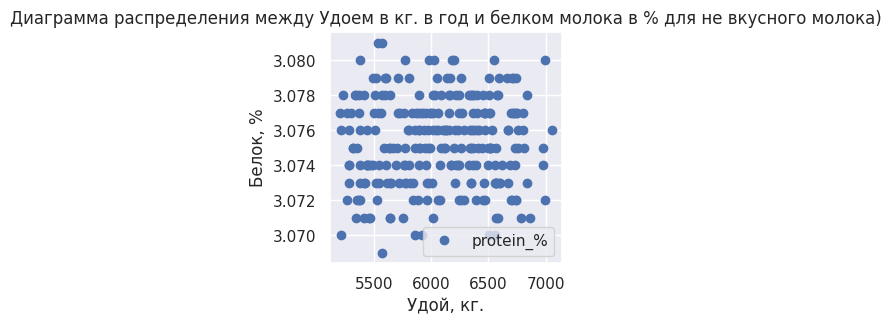

In [ ]:
#строим диаграмму рассеяния для визуализации взаимосвязи между двумя числовыми признаками с помощью точек,
#показывающих движение этих переменных вместе
general_taste.plot(y = 'protein_%', x = 'milk_yield_kg', style = 'o', color = 'r', figsize=(3,3));
plt.title(f'Диаграмма распределения между Удоем в кг. в год и белком молока в % для вкусного молока)')
plt.xlabel('Удой, кг.')
plt.ylabel('Белок, %');
plt.show();

general_not_taste.plot(y = 'protein_%', x = 'milk_yield_kg', style = 'o', color = 'b', figsize=(3,3));
plt.title(f'Диаграмма распределения между Удоем в кг. в год и белком молока в % для не вкусного молока)')
plt.xlabel('Удой, кг.')
plt.ylabel('Белок, %');
plt.show();

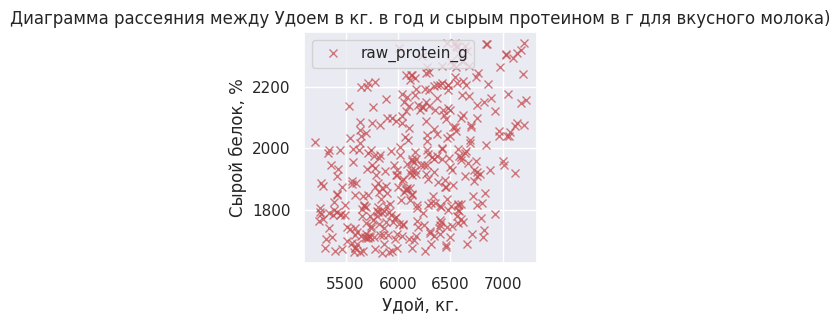

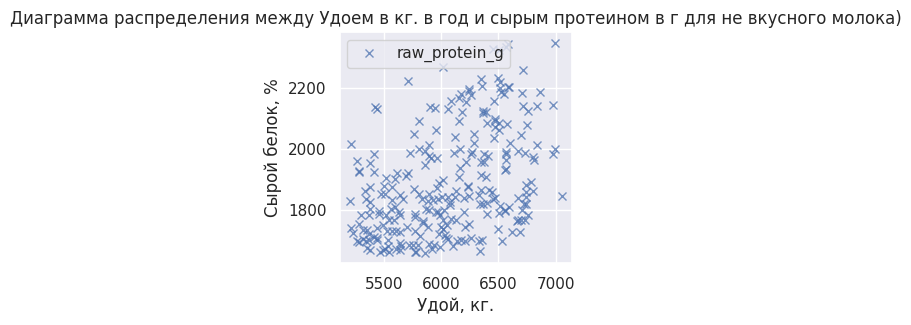

In [ ]:
#строим диаграмму рассеяния для визуализации взаимосвязи между двумя числовыми признаками с помощью точек,
#показывающих движение этих переменных вместе
general_taste.plot(y = 'raw_protein_g', x = 'milk_yield_kg', style = 'x', color = 'r', figsize=(3,3), alpha=0.75);
plt.title(f'Диаграмма рассеяния между Удоем в кг. в год и сырым протеином в г для вкусного молока)')
plt.xlabel('Удой, кг.')
plt.ylabel('Сырой белок, %');
plt.show();

general_not_taste.plot(y = 'raw_protein_g', x = 'milk_yield_kg', style = 'x', color = 'b', figsize=(3,3), alpha=0.75);
plt.title(f'Диаграмма распределения между Удоем в кг. в год и сырым протеином в г для не вкусного молока)')
plt.xlabel('Удой, кг.')
plt.ylabel('Сырой белок, %');
plt.show();

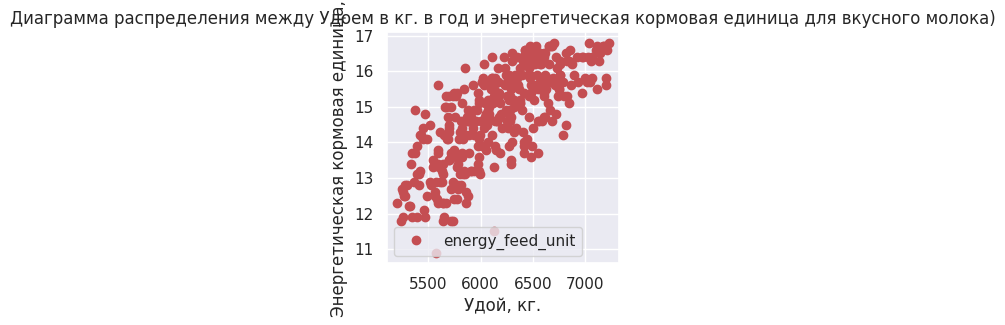

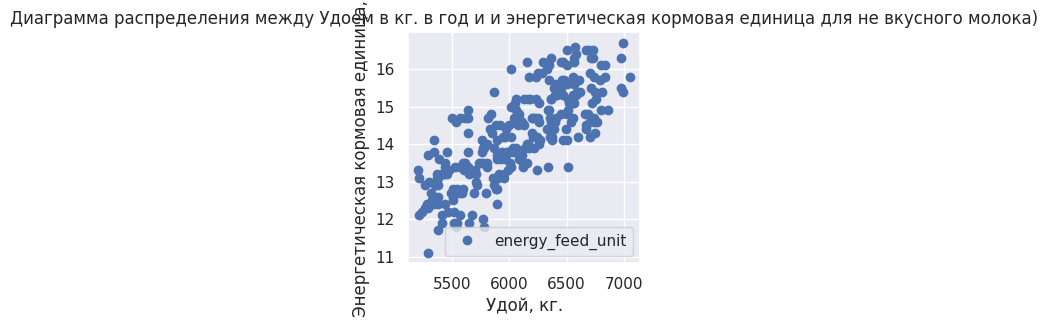

In [ ]:
#строим диаграмму рассеяния для визуализации взаимосвязи между двумя числовыми признаками с помощью точек,
#показывающих движение этих переменных вместе
general_taste.plot(y = 'energy_feed_unit', x = 'milk_yield_kg', style = 'o', color = 'r', figsize=(3,3));
plt.title(f'Диаграмма распределения между Удоем в кг. в год и энергетическая кормовая единица для вкусного молока)')
plt.xlabel('Удой, кг.')
plt.ylabel('Энергетическая кормовая единица, %');
plt.show();

general_not_taste.plot(y = 'energy_feed_unit', x = 'milk_yield_kg', style = 'o', color = 'b', figsize=(3,3));
plt.title(f'Диаграмма распределения между Удоем в кг. в год и и энергетическая кормовая единица для не вкусного молока)')
plt.xlabel('Удой, кг.')
plt.ylabel('Энергетическая кормовая единица, %');
plt.show();

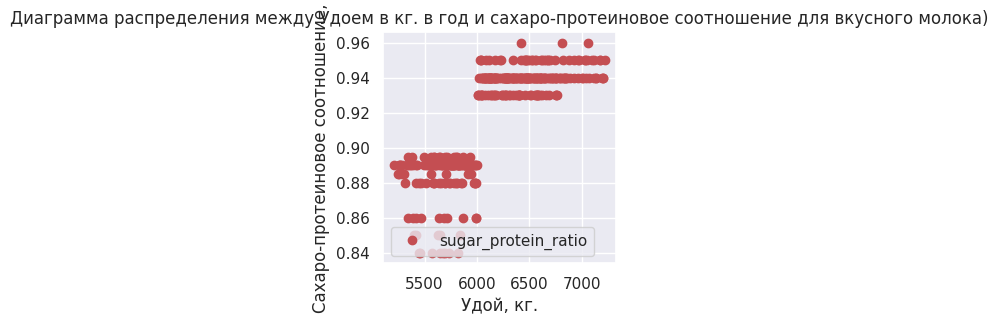

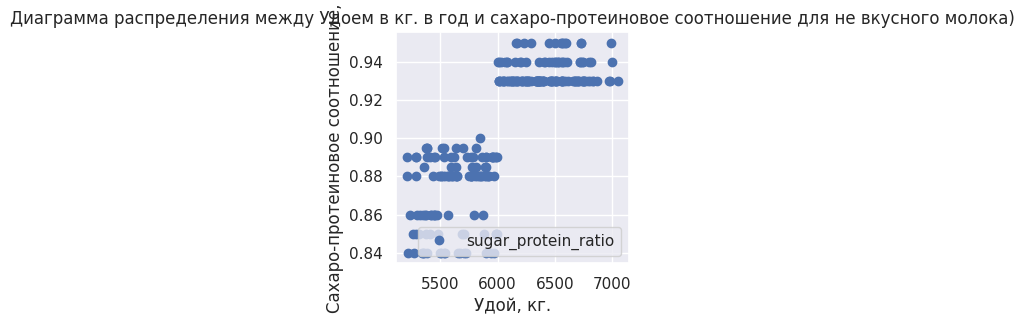

In [ ]:
general_taste.plot(y = 'sugar_protein_ratio', x = 'milk_yield_kg', style = 'o', color = 'r', figsize=(3,3));
plt.title(f'Диаграмма распределения между Удоем в кг. в год и сахаро-протеиновое соотношение для вкусного молока)')
plt.xlabel('Удой, кг.')
plt.ylabel('Сахаро-протеиновое соотношение, %');
plt.show();

general_not_taste.plot(y = 'sugar_protein_ratio', x = 'milk_yield_kg', style = 'o', color = 'b', figsize=(3,3));
plt.title(f'Диаграмма распределения между Удоем в кг. в год и сахаро-протеиновое соотношение для не вкусного молока)')
plt.xlabel('Удой, кг.')
plt.ylabel('Сахаро-протеиновое соотношение, %');
plt.show();

## 4.3. Выводы о взаимосвязи признаков.
**Какой тип взаимосвязи между целевым и входными признаками?**   

 Между целевым признаком milk_yield_kg (Удой в кг в год) и некоторыми входными признаками сильная линейная зависимость:  
 - Очень высокая - sugar_protein_ratio и energy_feed_unit   
 - Высокая и средняя - fat_%  и raw_protein_g  

**Есть ли нелинейные связи между целевым и входными признаками?**   
Со некоторыми признаками у целевого признака есть нелинейные взаимосвязи  

**Нужно ли вводить в модель дополнительные признаки, чтобы это учесть?**   

Нужно избавится от линейной зависимости. Можно ввести дополнительные столбцы, которые помогут сохранить взаимосвязи между значениями признаков и  избавиться от сильной корреляции.

**Наблюдается ли мультиколлинеарность между входными признаками?**  
По матрице корреляций видим сильную взаимосвязь между входными признаками:  
 energy_feed_unit, sugar_protein_ratio и fat_%


#Шаг 5. Задача регрессии  

Обучим 3 модели простой линейной регрессии.

## 5.1. Первая модель линейной регрессии  

 Подготовим данные датасета ferma_main.csv и обучим на них первую модель LinearRegression.

Подготовим выборки, разделим датасет на тренировочную и тестовую.

In [ ]:
X = general.drop('milk_yield_kg', axis=1)
y = general['milk_yield_kg']
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE)


Выберем для последующего обучения наиболее подходящие категориальные и числовые признаки.   
- Порода, пастбище, порода отца быка и возраст коровы    
Все категариальные признаки влияют как на удой, так и на вкус молока.  

- Энергетическая кормовая единица, Сахаро-протеиновое соотношение и	Сырой протеин  
Эти признаки влияют напрямую на Удой, качество и вкус молока (т. к. указанные показатели отражают качество корма).   
Остальные признаки имеют корреляцию с указанными и могут отрицательно повлиять на качество обучаемой модели.


In [ ]:
# список категориальных признаков из тренировочной выборки
categorial_n = ['breed',	'pasture', 'dad_bull_breed', 'age']
# список всех ключевых числовых признаков из тренировочной выборки
numeric_n = ['energy_feed_unit',	'raw_protein_g', 'sugar_protein_ratio']

In [ ]:
# Инициализируем OneHotEncoder для кодирования категориальных данных
#encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
encoder = OneHotEncoder(sparse_output=False)

# обучим и преобразуем категориальные признаки из тренировочной и тестовой выборк
X_train_ohe = encoder.fit_transform(X_train[categorial_n])
X_test_ohe = encoder.transform(X_test[categorial_n])

# передадим в переменную названия новых столбцов
encoder_columns_names = encoder.get_feature_names_out()

# в новые датафреймы запишем преобразованные категориальные признаки для тренировочной и тестовой выборок
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_columns_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_columns_names)


In [ ]:
# Для масштабирования количественных признаков используем StandardScaler
scaler = StandardScaler()

# Обучим и преобразуем колличественные признаки
X_train_scaled = scaler.fit_transform(X_train[numeric_n])
X_test_scaled = scaler.transform(X_test[numeric_n])

# Создадим датафрейм из закодированных данных
X_train_scaled = pd.DataFrame(X_train_scaled, columns = numeric_n)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = numeric_n)

In [ ]:
# Объединим закодированные категориальные признаки и отмасштабированные количественные данные отдельно для тренировочной и тестовой выборок
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

display(X_train)
display(X_test)

,breed_Вис Бик Айдиал,breed_РефлешнСоверинг,pasture_равнинное,pasture_холмистое,dad_bull_breed_Айдиал,dad_bull_breed_Соверин,age_более_2_лет,age_менее_2_лет,energy_feed_unit,raw_protein_g,sugar_protein_ratio
0,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.016,0.248,0.814
1,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.096,-1.392,-1.072
2,1.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0.016,1.124,0.500
3,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,-1.174,0.858,-0.758
4,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,0.572,-0.672,0.500
...,...,...,...,...,...,...,...,...,...,...,...
466,0.000,1.000,1.000,0.000,1.000,0.000,1.000,0.000,-0.857,0.947,-0.601
467,1.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,-1.095,-0.411,-0.758
468,0.000,1.000,1.000,0.000,0.000,1.000,1.000,0.000,-0.301,1.562,1.129
469,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,0.889,-0.350,0.814


,breed_Вис Бик Айдиал,breed_РефлешнСоверинг,pasture_равнинное,pasture_холмистое,dad_bull_breed_Айдиал,dad_bull_breed_Соверин,age_более_2_лет,age_менее_2_лет,energy_feed_unit,raw_protein_g,sugar_protein_ratio
0,1.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,-1.492,-1.198,-2.016
1,1.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,1.286,-0.916,0.814
2,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,-0.539,-0.677,-1.701
3,1.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,-0.777,-0.589,0.500
4,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,0.651,-1.159,-0.758
...,...,...,...,...,...,...,...,...,...,...,...
153,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,-0.936,-0.128,0.814
154,1.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,-0.857,0.354,-0.758
155,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,-1.412,-0.189,-0.601
156,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,-0.222,-0.555,0.500


In [ ]:
# обучим модель линейной регрессии на тренировочной выборке и получим предсказания для тестовой
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)

# Сравним предсказанные и истиные значения
display('Предсказанное и истиное значение:', predictions[100], y_test.iloc[100])

# Проверим, качество модели, выдадим инфо о коэффициентах
display('Коэффициенты:', model_lr.coef_, model_lr.intercept_)

'Предсказанное и истиное значение:'

6212.429274147863

6038

'Коэффициенты:'

array([ -15.61889026,   15.61889026,  -29.28076506,   29.28076506,
        117.06217899, -117.06217899,  106.92588665, -106.92588665,
        139.39072462,   41.34112512,  177.01160628])

6060.81035791594

In [ ]:
# Выведем значения коэффициента детерминации R2 для линейной регрессии
display (r2_score(y_test, predictions))

0.8189336328735966

В ходе обучения получилась модель линейной регрессии, которая предсказывает значения с вероятностью почти 82%, то есть ошибается в 18% случаев.   
Такой показатель ошибочных значений достаточно высок для того, чтобы признать данную модель успешной.  

In [ ]:
# анализ остатков
remains = y_test - predictions
remains.describe()

,milk_yield_kg
count,158.000
mean,12.046
std,223.126
min,-507.199
25%,-152.380
50%,30.751
75%,147.653
max,556.683


In [ ]:
# рассчетаем средняя абсолютная ошибка, среднеквадратичную ошибку и квадратный корень из MSE.
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

display('mae:', mae, 'mse:', mse, 'rmse:', rmse)

'mae:'

181.03876471186925

'mse:'

49615.04881247563

'rmse:'

222.74435753229673

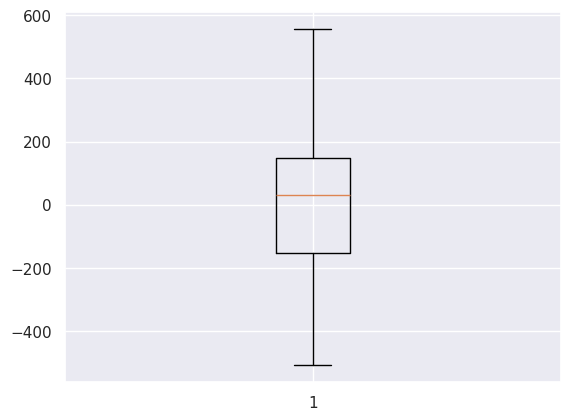

In [ ]:
#построим график размаха по остаткам
plt.boxplot(remains)
#plt.ylim(-200, 200)
plt.show()

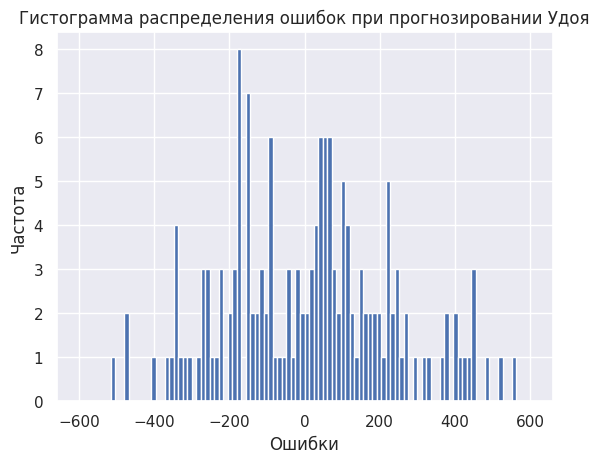

In [ ]:
remains.plot(y = 'milk_yield_kg', kind = 'hist', bins = 100, grid = True, range = (-600,600));
plt.title('Гистограмма распределения ошибок при прогнозировании Удоя')
plt.xlabel('Ошибки')
plt.ylabel('Частота')
plt.show();

*Выводы:  *

По анализу остатков можно увидеть, что медианное значение ошибки - 31, среднее -12. Минимальное - 507, максимальное - 557.   
Такие показатели погрешности в предсказаниях достаточно велики, чтобы признать модель рабочим инструментом для решения поставленных задач.  
Распределение ошибок в целом нормальное, но есть выбросы.  
Модель требует доработки.  

Модель машинного обучения на основе линейной регрессии хорошо подошла для решения поставленной задачи прогнозирования и показала достойный коэффициен детерминации. Т.е. модель нашла некоторые взаимосвязи в признаках.   
По анализу остатков видим, что все же разброс остатков достаточно широкий и в нем присутствуют сильно выбивающиеся значения.   

Для повышения точности модели и снижения ошибок прогнозирования необходимо подобрать включение дополнительных признаков в датасет и использование новой модели машинного обучения, а также проведение дополнительных исследований.   
Последующие шаги должны привести к улучшению результатов прогнозирования.   

##**5.2. Обучим вторую модель линейной регрессии**  
В ходе анализа остатков предыдущей модели, было обпределено, что некоторые входные признаки связаны с целевым нелинейно:

- СПО и Удой. На их диаграмме рассеяния данные сгруппированы в два кластера, причём есть такое значение СПО, которое можно считать границей между кластерами - это значение 0.91. Чтобы устранить нелинейность, преобразуем СПО в категориальный бинарный признак, использовав эту границу.
- ЭКЕ и Удой. Нелинейность между ними можно исключить, если ввести в датасет новый признак ЭКЕ в квадрате.

In [ ]:
# Добавим в датасет новый признак, который будет равен
# 1, если значение сахаро-протеинового соотношения больше границы (0.91), и 0, если меньше
general['sugar_protein_ratio_category'] = (general['sugar_protein_ratio'] > 0.91).astype('category')

# Добавим в датасет еще один новый признак-  'feed_energy_unit' ** 2
general['energy_feed_unit_squared'] = general['energy_feed_unit'] ** 2

# Проверим дополненный датасет, выведем случайные строки
general.sample(n=7)

,id,milk_yield_kg,energy_feed_unit,raw_protein_g,sugar_protein_ratio,breed,pasture,dad_bull_breed,fat_%,protein_%,taste,age,milk_yield_6000kg,sugar_protein_ratio_category,energy_feed_unit_squared
372,373,6600,15.600,1971,0.940,Вис Бик Айдиал,равнинное,Айдиал,3.730,3.076,вкусно,более_2_лет,1,True,243.360
3,4,5895,12.400,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.650,3.075,не вкусно,более_2_лет,0,False,153.760
45,46,5796,14.100,1797,0.895,Вис Бик Айдиал,равнинное,Айдиал,3.650,3.074,вкусно,более_2_лет,0,False,198.810
499,500,6601,15.400,1963,0.940,РефлешнСоверинг,равнинное,Айдиал,3.710,3.076,вкусно,более_2_лет,1,True,237.160
200,201,5443,13.200,2130,0.860,Вис Бик Айдиал,равнинное,Соверин,3.620,3.076,не вкусно,менее_2_лет,0,False,174.240
65,66,6163,15.200,1999,0.930,Вис Бик Айдиал,холмистое,Айдиал,3.720,3.079,не вкусно,более_2_лет,1,True,231.040
240,241,5568,13.400,1733,0.880,Вис Бик Айдиал,равнинное,Соверин,3.630,3.069,не вкусно,менее_2_лет,0,False,179.560


In [ ]:
#повторим все шаги для подготовки данных и обучения новой модели
X = general.drop('milk_yield_kg', axis=1)
y = general['milk_yield_kg']
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE)

# список категориальных признаков из тренировочной выборки
categorial_n = ['breed',	'pasture', 'dad_bull_breed', 'age', 'sugar_protein_ratio_category']
# список всех ключевых числовых признаков из тренировочной выборки
numeric_n = ['energy_feed_unit',	'raw_protein_g', 'energy_feed_unit_squared']

# Инициализируем OneHotEncoder для кодирования категориальных данных
#encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
encoder = OneHotEncoder(sparse_output=False)

# обучим и преобразуем категориальные признаки из тренировочной и тестовой выборк
X_train_ohe = encoder.fit_transform(X_train[categorial_n])
X_test_ohe = encoder.transform(X_test[categorial_n])

# передадим в переменную названия новых столбцов
encoder_columns_names = encoder.get_feature_names_out()

# в новые датафреймы запишем преобразованные категориальные признаки для тренировочной и тестовой выборок
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_columns_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_columns_names)

# Для масштабирования количественных признаков используем StandardScaler
scaler = StandardScaler()

# Обучим и преобразуем колличественные признаки
X_train_scaled = scaler.fit_transform(X_train[numeric_n])
X_test_scaled = scaler.transform(X_test[numeric_n])

# Создадим датафрейм из закодированных данных
X_train_scaled = pd.DataFrame(X_train_scaled, columns = numeric_n)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = numeric_n)

# Объединим закодированные категориальные признаки и отмасштабированные количественные данные отдельно для тренировочной и тестовой выборок
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

display(X_train)
display(X_test)

# обучим модель линейной регрессии на тренировочной выборке и получим предсказания для тестовой
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)

# Сравним предсказанные и истиные значения
display('Предсказанное и истиное значение:', predictions[100], y_test.iloc[100])

# Проверим, качество модели, выдадим инфо о коэффициентах
display('Коэффициенты:', model_lr.coef_, model_lr.intercept_)

# Выведем значения коэффициента детерминации R2 для линейной регрессии
display (r2_score(y_test, predictions))

# анализ остатков
remains = y_test - predictions
remains.describe()


,breed_Вис Бик Айдиал,breed_РефлешнСоверинг,pasture_равнинное,pasture_холмистое,dad_bull_breed_Айдиал,dad_bull_breed_Соверин,age_более_2_лет,age_менее_2_лет,sugar_protein_ratio_category_0.0,sugar_protein_ratio_category_1.0,energy_feed_unit,raw_protein_g,energy_feed_unit_squared
0,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.016,0.248,-0.027
1,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.096,-1.392,0.054
2,1.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,1.000,0.016,1.124,-0.027
3,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,-1.174,0.858,-1.173
4,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,1.000,0.572,-0.672,0.550
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,0.000,1.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,-0.857,0.947,-0.880
467,1.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,-1.095,-0.411,-1.100
468,0.000,1.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,-0.301,1.562,-0.345
469,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,1.000,0.889,-0.350,0.892


,breed_Вис Бик Айдиал,breed_РефлешнСоверинг,pasture_равнинное,pasture_холмистое,dad_bull_breed_Айдиал,dad_bull_breed_Соверин,age_более_2_лет,age_менее_2_лет,sugar_protein_ratio_category_0.0,sugar_protein_ratio_category_1.0,energy_feed_unit,raw_protein_g,energy_feed_unit_squared
0,1.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,-1.492,-1.198,-1.457
1,1.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,1.000,1.286,-0.916,1.332
2,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,-0.539,-0.677,-0.577
3,1.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,-0.777,-0.589,-0.805
4,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,0.651,-1.159,0.635
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,-0.936,-0.128,-0.954
154,1.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,-0.857,0.354,-0.880
155,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,-1.412,-0.189,-1.387
156,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,-0.222,-0.555,-0.266


'Предсказанное и истиное значение:'

6169.67670713305

6038

'Коэффициенты:'

array([ -17.14575393,   17.14575393,  -18.31551047,   18.31551047,
        101.40609803, -101.40609803,  126.04001987, -126.04001987,
       -203.50340547,  203.50340547, -750.19920727,   36.46904369,
        879.26066876])

6007.381492492102

0.8526399644167759

,milk_yield_kg
count,158.000
mean,3.548
std,201.553
min,-513.444
25%,-128.866
50%,-20.028
75%,139.485
max,562.084


In [ ]:
# рассчетаем средняя абсолютная ошибка, среднеквадратичную ошибку и квадратный корень из MSE.
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

display('mae:', mae, 'mse:', mse, 'rmse:', rmse)

'mae:'

159.3109910786331

'mse:'

40378.9807820343

'rmse:'

200.94521836071218

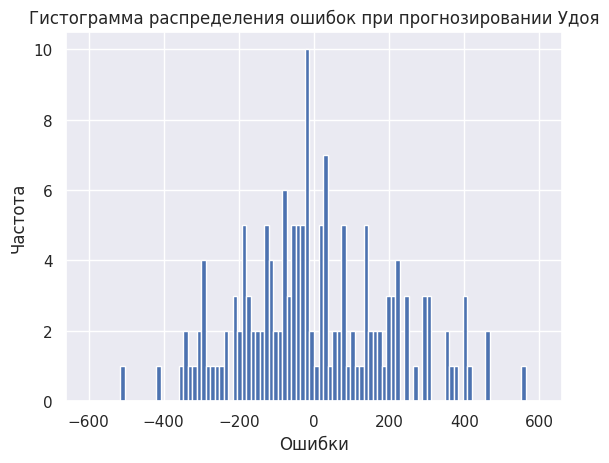

In [ ]:

remains.plot(y = 'milk_yield_kg', kind = 'hist', bins = 100, grid = True, range = (-600,600));
plt.title('Гистограмма распределения ошибок при прогнозировании Удоя')
plt.xlabel('Ошибки')
plt.ylabel('Частота')
plt.show();

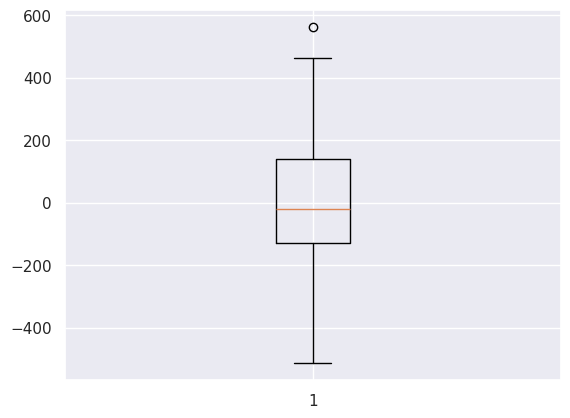

In [ ]:
#построим график размаха по остаткам
plt.boxplot(remains)
#plt.ylim(-200, 200)
plt.show()

**Выводы:  **

Вторая модель линейной регрессии в 85.3% случаев верно предсказывает результат. Вторая модель чуть точнее, чем первая.  
Анализ ошибок это подтверждает.   
Но все-равно качество работы модели не достаточное.   
Нужна дальнейшая работа над улучшением входных параметров.  
Построим третью модель машинного обучения.  


##5.3. Третья модель линейной регрессии.
- Добавим в датасет новый признак Имя Папы из файла ferma_dad.csv. Соединим его с остальными данными ferma_main.csv по ключу (id).   
Устраним нелинейность между признаками:  
- Добавим в датасет новый признак сырой протеин, возведенный в квадрат.  

- Преобразуем жирность в категориальный признак, используя для кластеризации границу - 3.68  


In [ ]:
# Добавим новый признак в датасет general из другой таблицы
general = pd.merge(general, dad, on='id', how='left')
display(general.head())

,id,milk_yield_kg,energy_feed_unit,raw_protein_g,sugar_protein_ratio,breed,pasture,dad_bull_breed,fat_%,protein_%,taste,age,milk_yield_6000kg,sugar_protein_ratio_category,energy_feed_unit_squared,dad_name
0,1,5863,14.200,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.580,3.076,вкусно,более_2_лет,0,False,201.640,Буйный
1,2,5529,12.800,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.540,3.079,вкусно,менее_2_лет,0,False,163.840,Соловчик
2,3,5810,14.000,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.590,3.074,не вкусно,более_2_лет,0,False,196.000,Барин
3,4,5895,12.400,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.650,3.075,не вкусно,более_2_лет,0,False,153.760,Буйный
4,5,5302,12.800,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.730,3.073,вкусно,менее_2_лет,0,False,163.840,Барин


In [ ]:
# Создадим новый признак, который будет равен 1, если значение жирность больше границы 3.68, и 0 если меньше
general['fat_%_category'] = (general['fat_%'] > 3.68 ).astype('category')

In [ ]:
# Создадим новый признак = 'feed_energy_unit' ** 2
general['raw_protein_g_squared'] = general['raw_protein_g'] ** 2

# Проверим обновленный датафрейм
display (general.head())

,id,milk_yield_kg,energy_feed_unit,raw_protein_g,sugar_protein_ratio,breed,pasture,dad_bull_breed,fat_%,protein_%,taste,age,milk_yield_6000kg,sugar_protein_ratio_category,energy_feed_unit_squared,dad_name,fat_%_category,raw_protein_g_squared
0,1,5863,14.200,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.580,3.076,вкусно,более_2_лет,0,False,201.640,Буйный,False,3038049
1,2,5529,12.800,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.540,3.079,вкусно,менее_2_лет,0,False,163.840,Соловчик,False,4571044
2,3,5810,14.000,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.590,3.074,не вкусно,более_2_лет,0,False,196.000,Барин,False,3437316
3,4,5895,12.400,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.650,3.075,не вкусно,более_2_лет,0,False,153.760,Буйный,False,4048144
4,5,5302,12.800,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.730,3.073,вкусно,менее_2_лет,0,False,163.840,Барин,True,2805625


In [ ]:
#повторим все шаги для подготовки данных и обучения новой модели
X = general.drop('milk_yield_kg', axis=1)
y = general['milk_yield_kg']
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE)

# список категориальных признаков из тренировочной выборки
categorial_n = ['breed',	'pasture', 'dad_bull_breed', 'age', 'sugar_protein_ratio_category', 'fat_%_category', 'dad_name']
# список всех ключевых числовых признаков из тренировочной выборки
numeric_n = [ 'energy_feed_unit_squared', 'raw_protein_g_squared']

# Инициализируем OneHotEncoder для кодирования категориальных данных
#encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
encoder = OneHotEncoder(sparse_output=False)

# обучим и преобразуем категориальные признаки из тренировочной и тестовой выборк
X_train_ohe = encoder.fit_transform(X_train[categorial_n])
X_test_ohe = encoder.transform(X_test[categorial_n])

# передадим в переменную названия новых столбцов
encoder_columns_names = encoder.get_feature_names_out()

# в новые датафреймы запишем преобразованные категориальные признаки для тренировочной и тестовой выборок
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_columns_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_columns_names)

# Для масштабирования количественных признаков используем StandardScaler
scaler = StandardScaler()

# Обучим и преобразуем колличественные признаки
X_train_scaled = scaler.fit_transform(X_train[numeric_n])
X_test_scaled = scaler.transform(X_test[numeric_n])

# Создадим датафрейм из закодированных данных
X_train_scaled = pd.DataFrame(X_train_scaled, columns = numeric_n)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = numeric_n)

# Объединим закодированные категориальные признаки и отмасштабированные количественные данные отдельно для тренировочной и тестовой выборок
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

display(X_train)
display(X_test)

# обучим модель линейной регрессии на тренировочной выборке и получим предсказания для тестовой
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)

# Сравним предсказанные и истиные значения
display('Предсказанное и истиное значение:', predictions[100], y_test.iloc[100])

# Проверим, качество модели, выдадим инфо о коэффициентах
display('Коэффициенты:', model_lr.coef_, model_lr.intercept_)

# Выведем значения коэффициента детерминации R2 для линейной регрессии
display (r2_score(y_test, predictions))

# анализ остатков
remains = y_test - predictions
remains.describe()

,breed_Вис Бик Айдиал,breed_РефлешнСоверинг,pasture_равнинное,pasture_холмистое,dad_bull_breed_Айдиал,dad_bull_breed_Соверин,age_более_2_лет,age_менее_2_лет,sugar_protein_ratio_category_0.0,sugar_protein_ratio_category_1.0,fat_%_category_0.0,fat_%_category_1.0,dad_name_Барин,dad_name_Буйный,dad_name_Геркулес,dad_name_Соловчик,energy_feed_unit_squared,raw_protein_g_squared
0,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,-0.027,0.200
1,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.054,-1.316
2,1.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,-0.027,1.110
3,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,-1.173,0.826
4,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.550,-0.681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,0.000,1.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,-0.880,0.920
467,1.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,-1.100,-0.440
468,0.000,1.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,-0.345,1.591
469,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.892,-0.382


,breed_Вис Бик Айдиал,breed_РефлешнСоверинг,pasture_равнинное,pasture_холмистое,dad_bull_breed_Айдиал,dad_bull_breed_Соверин,age_более_2_лет,age_менее_2_лет,sugar_protein_ratio_category_0.0,sugar_protein_ratio_category_1.0,fat_%_category_0.0,fat_%_category_1.0,dad_name_Барин,dad_name_Буйный,dad_name_Геркулес,dad_name_Соловчик,energy_feed_unit_squared,raw_protein_g_squared
0,1.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,-1.457,-1.150
1,1.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,1.332,-0.901
2,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,-0.577,-0.686
3,1.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,-0.805,-0.605
4,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.635,-1.116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,-0.954,-0.170
154,1.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,-0.880,0.305
155,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,-1.387,-0.229
156,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,-0.266,-0.574


'Предсказанное и истиное значение:'

6198.215765678255

6038

'Коэффициенты:'

array([ -13.95492648,   13.95492648,  -36.01527271,   36.01527271,
          5.61822378,   -5.61822378,  110.52749596, -110.52749596,
       -135.19551248,  135.19551248, -100.16849396,  100.16849396,
       -142.00047982,  125.09249446,  117.6512938 , -100.74330844,
        106.78762485,   35.79001676])

6051.248065390201

0.8753653749479721

,milk_yield_kg
count,158.000
mean,5.431
std,185.310
min,-428.109
25%,-120.663
50%,-9.397
75%,121.644
max,489.109


In [ ]:
# рассчетаем средняя абсолютная ошибка, среднеквадратичную ошибку и квадратный корень из MSE.
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

display('mae:', mae, 'mse:', mse, 'rmse:', rmse)

'mae:'

147.47549527407912

'mse:'

34151.858811880025

'rmse:'

184.80221538682923

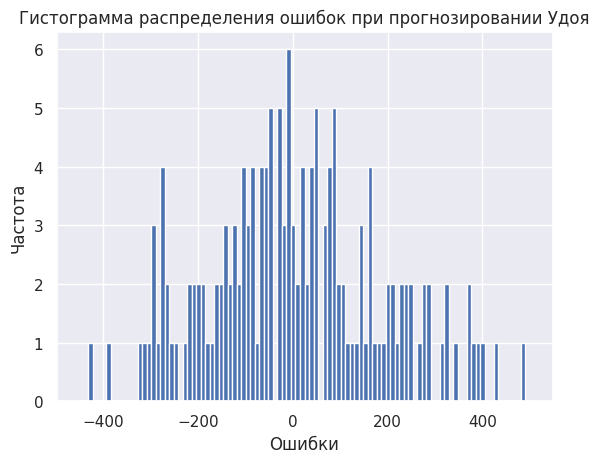

In [ ]:
remains.plot(y = 'milk_yield_kg', kind = 'hist', bins = 100, grid = True, range = (-450,500));
plt.title('Гистограмма распределения ошибок при прогнозировании Удоя')
plt.xlabel('Ошибки')
plt.ylabel('Частота')
plt.show();

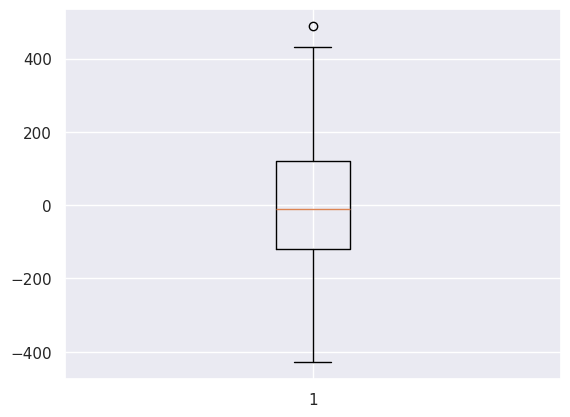

In [ ]:
#построим график размаха по остаткам
plt.boxplot(remains)
plt.show()

Третья модель показывает чуть лучший результат, чем вторая. Вероятность верно предсказать ответ увеличилась и стала равна - почти 88%.  

##5.4. Сравните качество трёх моделей линейной регрессии, сопоставьте их R² и остатки.


Первая модель линейной регрессии:  
- R2 = 0.818
- Анализ остатков:  

count	158.000  
mean	12.046  
std	223.126  
min	-507.199  
25%	-152.380  
50%	30.751  
75%	147.653  
max	556.683   


Вторая модель линейной регрессии:  
- R2 = 0.85   
- Анализ остатков:  
  
count	158.000  
mean	3.548  
std	201.553  
min	-513.444  
25%	-128.866  
50%	-20.028  
75%	139.485  
max	562.084  


Третья модель линейной регрессии:  
- R2 = 0.878  
- Анализ остатков:  
  
count	158.000  
mean	5.431  
std	185.310  
min	-428.109  
25%	-120.663  
50%	-9.397  
75%	121.644  
max	489.109  



По анализу R2 остатков видно, что каждая последующая модель лучше предсказывает значения, чем  предыдущая.

## 5.5. Оцените качество каждой модели по трём метрикам: MSE, MAE, RMSE. Используйте функции для расчёта метрик.
Выберите лучшую модель;   
Укажите доверительный интервал прогноза лучшей модели. Для этого рассчитайте квантили ошибки модели на тренировочных данных.  


Выбор лучшей модели по показателям оценки ошибок:   
Для MSE, RMSE и MAE - чем меньше значение, тем лучше модель предсказывает целевой признак.


**Первая модель**  
mae: 181.03876471186925  
mse: 49615.04881247562  
rmse: 222.7443575322967  
**Вторая модель**   
mae: 159.31099107863324  
mse: 40378.98078203429  
rmse: 200.94521836071215  
**Третья модель**   
mae:147.47549527407912  
mse:34151.858811880025  
rmse:184.80221538682923   

**Вывод**  
По анализу ошибок видим, что третья модель является лучшей из обученныхю   

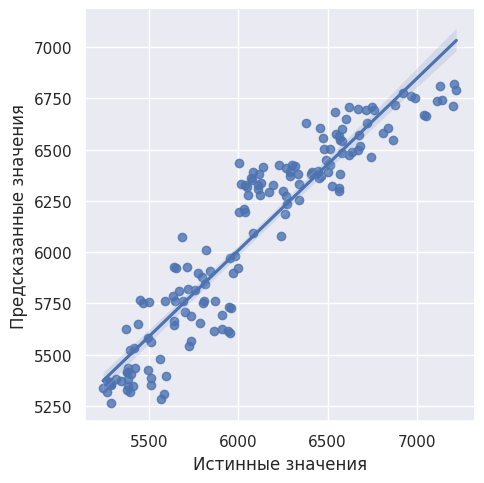

In [ ]:
#.Визуализируем доверительный интервал
df = pd.DataFrame({ 'Истинные_значения': y_test,'Предсказанные_значения': predictions})
sns.set_theme()

# построим график
g = sns.lmplot(data=df,x="Истинные_значения", y="Предсказанные_значения" )
g.set_axis_labels("Истинные значения", "Предсказанные значения");

In [ ]:
# Посчитаем, чему равен 5-й и 95-ый квантили
lower_ = np.quantile(predictions, 0.05)
upper_ = np.quantile(predictions, 0.95)

# Границы доверительного интервала
display(f'Нижняя - {lower_:.3f} и верхняя граница доверительного интервала - {upper_:.3f}')

'Нижняя - 5348.118 и верхняя граница доверительного интервала - 6722.722'

Нижняя граница доверит. интервала равна 5348.12, а верхняя - 6722.72 . Т.е. с 95%-ой вероятностью третья модель линейной регрессии прогнозирует удой от 5348.12 до 6722.72 кг. в год.

## 5.6. С помощью лучшей - третьей модели спрогнозируем удой коров, которых фермер хочет купить. Данные о них находятся в датасете cow_buy.csv.   
- Добавим недостающие признаки ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение): возьмем из датасета ferma_main.csv средние значения каждого из признаков и увеличим их на 5%.  


In [ ]:
# Добавим новые столбцы в датасет - средние значения признаков, увеличив значения на +5%
new_cow['energy_feed_unit'] = (general['energy_feed_unit'].mean() * 1.05).round(3)
new_cow['raw_protein_g'] = (general['raw_protein_g'].mean() * 1.05).round(3)
new_cow['sugar_protein_ratio'] = (general['sugar_protein_ratio'].mean() * 1.05).round(3)
new_cow.head()

,breed,pasture,dad_bull_breed,dad_name,fat_%,protein_%,age,energy_feed_unit,raw_protein_g,sugar_protein_ratio
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.580,3.076,более_2_лет,15.271,"2,019.532",0.959
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.540,3.081,менее_2_лет,15.271,"2,019.532",0.959
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.590,3.074,более_2_лет,15.271,"2,019.532",0.959
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.400,3.061,более_2_лет,15.271,"2,019.532",0.959
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.640,3.074,более_2_лет,15.271,"2,019.532",0.959


In [ ]:
# Добавим в датасет новый признак, который будет равен
# 1, если значение сахаро-протеинового соотношения больше границы (0.91), и 0, если меньше
new_cow['sugar_protein_ratio_category'] = (new_cow['sugar_protein_ratio'] > 0.91).astype('category')

# Создадим новый признак - 'feed_energy_unit' ** 2
new_cow['energy_feed_unit_squared'] = new_cow['energy_feed_unit'] ** 2

# Создадим новый признак, = 1, при Жирности больше 3.68, и 0 если меньше
new_cow['fat_%_category'] = (new_cow['fat_%'] > 3.68 ).astype('category')

# Создадим новый признак, = 'feed_energy_unit' ** 2
new_cow['raw_protein_g_squared'] = new_cow['protein_%'] ** 2

# Посмотрим на датафрейм для проверки
new_cow.sample(n=7)

,breed,pasture,dad_bull_breed,dad_name,fat_%,protein_%,age,energy_feed_unit,raw_protein_g,sugar_protein_ratio,sugar_protein_ratio_category,energy_feed_unit_squared,fat_%_category,raw_protein_g_squared
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.640,3.074,более_2_лет,15.271,"2,019.532",0.959,True,233.203,False,9.449
13,Вис Бик Айдиал,холмистое,Соверин,Барин,3.420,3.075,менее_2_лет,15.271,"2,019.532",0.959,True,233.203,False,9.456
19,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.640,3.074,более_2_лет,15.271,"2,019.532",0.959,True,233.203,False,9.449
16,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.730,3.079,более_2_лет,15.271,"2,019.532",0.959,True,233.203,True,9.480
12,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.680,3.046,более_2_лет,15.271,"2,019.532",0.959,True,233.203,False,9.278
10,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.730,3.055,более_2_лет,15.271,"2,019.532",0.959,True,233.203,True,9.333
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.570,3.079,более_2_лет,15.271,"2,019.532",0.959,True,233.203,False,9.480


- Выполним подготовку данных, аналогичную той, которую делали для тренировочной выборки.   


In [ ]:
# список категориальных признаков
categorial_n = ['breed',	'pasture', 'dad_bull_breed', 'age', 'sugar_protein_ratio_category', 'fat_%_category', 'dad_name']
# список всех ключевых числовых признаков
numeric_n = ['energy_feed_unit_squared', 'raw_protein_g_squared']

# Инициализируем OneHotEncoder для кодирования категориальных данных
encoder = OneHotEncoder(sparse_output=False)

# обучим и преобразуем категориальные признаки
X_ohe = encoder.fit_transform(new_cow[categorial_n])

# передадим в переменную названия новых столбцов
encoder_columns_names = encoder.get_feature_names_out()

# в новые датафреймы запишем преобразованные категориальные признаки
#X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_columns_names)
new_cow_ohe = pd.DataFrame(X_ohe, columns=encoder_columns_names)

# Для масштабирования количественных признаков используем StandardScaler
#scaler = StandardScaler()

# Обучим и преобразуем колличественные признаки
X_scaled = scaler.fit_transform(new_cow[numeric_n])

# Создадим датафрейм из закодированных данных
new_cow_scaled = pd.DataFrame(X_scaled, columns = numeric_n)

# Объединим закодированные категориальные признаки и отмасштабированные количественные данные
new_cow_update = pd.concat([new_cow_ohe, new_cow_scaled], axis=1)

#new_cow_update = new_cow_update.rename(columns={'pasture_холмистое': 'pasture_равнинные'})

new_cow_update.insert(8, 'sugar_protein_ratio_category_0.0', 0)


display(new_cow_update)

,breed_Вис Бик Айдиал,breed_РефлешнСоверинг,pasture_равнинное,pasture_холмистое,dad_bull_breed_Айдиал,dad_bull_breed_Соверин,age_более_2_лет,age_менее_2_лет,sugar_protein_ratio_category_0.0,sugar_protein_ratio_category_1.0,fat_%_category_0.0,fat_%_category_1.0,dad_name_Барин,dad_name_Буйный,dad_name_Геркулес,dad_name_Соловчик,energy_feed_unit_squared,raw_protein_g_squared
0,1.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.645
1,1.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0,1.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.144
2,0.000,1.000,1.000,0.000,0.000,1.000,1.000,0.000,0,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.446
3,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,0,1.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,-0.845
4,0.000,1.000,1.000,0.000,1.000,0.000,1.000,0.000,0,1.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.446
5,0.000,1.000,1.000,0.000,0.000,1.000,0.000,1.000,0,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,-1.637
6,1.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.645
7,1.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0,1.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.944
8,0.000,1.000,1.000,0.000,0.000,1.000,1.000,0.000,0,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.446
9,0.000,1.000,0.000,1.000,1.000,0.000,0.000,1.000,0,1.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.944


- Получим прогноз удоя коров для новой выборки на основе уже обученной линейной регрессии.

In [ ]:
# Использование обученной модели для предсказания и добавим предсказания в датасет
# Добавление нового столбца с предсказаниями в датасет
new_cow['predicted_milk_yield'] = model_lr.predict(new_cow_update)
display(new_cow.head())

# Сравним предсказанные и истиные значения
display('Предсказанное значение:', predictions[101])

,breed,pasture,dad_bull_breed,dad_name,fat_%,protein_%,age,energy_feed_unit,raw_protein_g,sugar_protein_ratio,sugar_protein_ratio_category,energy_feed_unit_squared,fat_%_category,raw_protein_g_squared,predicted_milk_yield
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.580,3.076,более_2_лет,15.271,"2,019.532",0.959,True,233.203,False,9.462,"6,365.221"
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.540,3.081,менее_2_лет,15.271,"2,019.532",0.959,True,233.203,False,9.493,"6,086.180"
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.590,3.074,более_2_лет,15.271,"2,019.532",0.959,True,233.203,False,9.449,"6,043.085"
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.400,3.061,более_2_лет,15.271,"2,019.532",0.959,True,233.203,False,9.370,"6,347.229"
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.640,3.074,более_2_лет,15.271,"2,019.532",0.959,True,233.203,False,9.449,"6,321.414"


'Предсказанное значение:'

5788.036211299774

Получен прогноз удоя коров из новой выборки.

In [ ]:
new_cow['predicted_milk_yield'].sort_values().round(2)

,predicted_milk_yield
13,"5,869.710"
5,"6,007.120"
2,"6,043.080"
14,"6,043.080"
8,"6,043.080"
1,"6,086.180"
9,"6,190.220"
17,"6,207.460"
12,"6,258.790"
10,"6,261.320"


**Вывод**  
Предсказанных значений меньше 6000 кг в год немного. Фермер сможет купить много коров, показатель удоя которых соответствует его ожиданиям.

#Шаг 6. Задача классификации


##6.1. Подготовим данные датасета ferma_main.csv и обучим на них модель логистической регресс - LogisticRegression.
- Используем в качестве целевого признак "Вкус молока".
  
- Разобьем данные на тренировочную и тестовую выборки.  
  
- Кодируем категориальные признаки с помощью OneHotEncoder.  
  
- Масштабируем количественные признаки с помощью StandardScaler.  
  
- Обучим модель логистической регрессии на подготовленных данных.  


In [ ]:
X = general.drop('taste', axis=1)
y = general['taste']
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE)

# список категориальных признаков из тренировочной выборки
categorial_n = ['breed',	'pasture', 'dad_bull_breed', 'age', 'sugar_protein_ratio_category', 'fat_%_category', 'dad_name']
# список всех ключевых числовых признаков из тренировочной выборки
numeric_n = [ 'energy_feed_unit_squared', 'raw_protein_g_squared']

# Инициализируем OneHotEncoder для кодирования категориальных данных
#encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
encoder = OneHotEncoder(sparse_output=False)

# обучим и преобразуем категориальные признаки из тренировочной и тестовой выборк
X_train_ohe = encoder.fit_transform(X_train[categorial_n])
X_test_ohe = encoder.transform(X_test[categorial_n])

# передадим в переменную названия новых столбцов
encoder_columns_names = encoder.get_feature_names_out()

# в новые датафреймы запишем преобразованные категориальные признаки для тренировочной и тестовой выборок
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_columns_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_columns_names)

# Для масштабирования количественных признаков используем StandardScaler
scaler = StandardScaler()

# Обучим и преобразуем колличественные признаки
X_train_scaled = scaler.fit_transform(X_train[numeric_n])
X_test_scaled = scaler.transform(X_test[numeric_n])

# Создадим датафрейм из закодированных данных
X_train_scaled = pd.DataFrame(X_train_scaled, columns = numeric_n)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = numeric_n)

# Объединим закодированные категориальные признаки и отмасштабированные количественные данные отдельно для тренировочной и тестовой выборок
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

#display(X_train)
#display(X_test)

# обучим модель логистической регрессии на тренировочной выборке и получим предсказания для тестовой
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)

# Сравним предсказанные и истиные значения
display('Предсказанное и истиное значение:', predictions[105], y_test.iloc[105])


'Предсказанное и истиное значение:'

'вкусно'

'вкусно'


- Оценим качество модели на тестовой выборке:   
рассчитаем метрики accuracy, recall, precision.  

In [ ]:
#acc, recall, precision, f1 = LogisticRegression(y_test, predictions)
display (y_test, predictions)

#Получаю ошибку при расчете accuracy:
#не разобралась, как устранить
#accuracy = accuracy_score(y_test, predictions)
#display (accuracy)

#Получаю ошибку при расчете precision:
#не разобралась, как устранить
#precision = precision_score(y_test, predictions)

#Получаю ошибку при расчете recall:
#не разобралась, как устранить
#recall = recall_score(y_test, predictions,  zero_division=1)


,milk_yield_kg
494,5315
244,6572
551,5392
213,6081
532,5772
...,...
603,6289
367,5733
79,5813
23,6320


array([5382.9985496 , 6381.52722703, 5521.50521234, 6091.96984711,
       5897.83383885, 6738.68698053, 5266.81237902, 5761.580398  ,
       6709.04104665, 5369.69532686, 6194.68421496, 6570.36865044,
       5426.82398813, 6548.56596308, 5384.72053977, 6547.22344199,
       5760.71732908, 6490.67906129, 6390.26298776, 5329.45760235,
       5695.80416517, 6349.84502584, 6719.90430575, 5352.92459325,
       6761.31168135, 6696.02207662, 5972.87431598, 6502.03090046,
       6580.10477247, 5921.65319282, 5284.12012223, 6465.44486627,
       5350.27370347, 6188.49627576, 6276.29800112, 6389.10514837,
       6333.3792396 , 6666.41823398, 5417.64879777, 6423.32300994,
       5372.73554973, 6424.80333841, 5480.03989312, 5561.68182583,
       5543.34171382, 5614.27039317, 6451.68005525, 6426.94834193,
       6326.41223869, 6606.4927885 , 6744.16553564, 5568.06807001,
       5762.20144753, 6280.40419698, 5760.68654888, 6667.23648314,
       6819.54370831, 5309.57353557, 5532.20835671, 5339.44677

- Постройте матрицу ошибок.

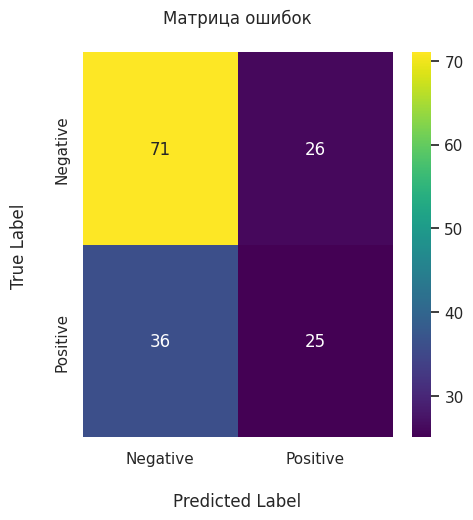

In [ ]:
# Визуализируем матрицу ошибок
matrix = confusion_matrix(y_test, predictions)

sns.heatmap(matrix, annot=True, cmap='viridis', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('\nPredicted Label')
plt.ylabel('True Label\n')
plt.title('Матрица ошибок\n');

Истинно отрицательных (TN): 71- модель правильно предсказала, что вкус молока - "не вкусно".   
Ложноположительных (FP): 25, модель неверно предсказала, что  вкус молоко - "вкусно".   
Ложноотрицательных (FN): 26, модель неверно предсказала, что  вкус молока - "не вкусно".   
Истинно положительных (TP): 36, модель правильно предсказала, что вкус молокоа - "вкусно".  

##6.2. Проанализируем модель логистической регрессии.
Объясните, какая ошибка критичнее всего при покупке коров: первого или второго рода. Помните, что главное для заказчика — вкусное молоко. Сформулируйте ответ с учётом метрик recall и precision, выберите более важную из них.
Сведите критичную ошибку к нулю: для этого измените порог принадлежности к классам. Ещё раз рассчитайте значения метрик recall и precision. Какое значение порога вы выбрали? Как изменились значения метрик?
Оформите выводы: скажите, что нужно сделать дальше, исходя из анализа модели?


Ошибки первого рода являются более важными для фермера. Недостижение целевых показателей скажется на финансовых и репутационных показателях бизнеса фермера.

##6.3. С помощью обученной модели спрогнозируем вкус молока коров, которых фермер хочет купить - cow_buy.csv.
Выполним подготовку данных, аналогичную той, которую делали для тренировочной выборки.
Получим прогноз вкуса молока коров.

In [ ]:
# список категориальных признаков
categorial_n = ['breed',	'pasture', 'dad_bull_breed', 'age', 'sugar_protein_ratio_category', 'fat_%_category', 'dad_name']
# список всех ключевых числовых признаков
numeric_n = ['energy_feed_unit_squared', 'raw_protein_g_squared']

# Инициализируем OneHotEncoder для кодирования категориальных данных
encoder = OneHotEncoder(sparse_output=False)

# обучим и преобразуем категориальные признаки
X_ohe = encoder.fit_transform(new_cow[categorial_n])

# передадим в переменную названия новых столбцов
encoder_columns_names = encoder.get_feature_names_out()

# в новые датафреймы запишем преобразованные категориальные признаки
#X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_columns_names)
new_cow_ohe = pd.DataFrame(X_ohe, columns=encoder_columns_names)

# Для масштабирования количественных признаков используем StandardScaler
#scaler = StandardScaler()

# Обучим и преобразуем колличественные признаки
X_scaled = scaler.fit_transform(new_cow[numeric_n])

# Создадим датафрейм из закодированных данных
new_cow_scaled = pd.DataFrame(X_scaled, columns = numeric_n)

# Объединим закодированные категориальные признаки и отмасштабированные количественные данные
new_cow_update = pd.concat([new_cow_ohe, new_cow_scaled], axis=1)

#new_cow_update = new_cow_update.rename(columns={'pasture_холмистое': 'pasture_равнинные'})

new_cow_update.insert(8, 'sugar_protein_ratio_category_0.0', 0)

display(new_cow_update)

,breed_Вис Бик Айдиал,breed_РефлешнСоверинг,pasture_равнинное,pasture_холмистое,dad_bull_breed_Айдиал,dad_bull_breed_Соверин,age_более_2_лет,age_менее_2_лет,sugar_protein_ratio_category_0.0,sugar_protein_ratio_category_1.0,fat_%_category_0.0,fat_%_category_1.0,dad_name_Барин,dad_name_Буйный,dad_name_Геркулес,dad_name_Соловчик,energy_feed_unit_squared,raw_protein_g_squared
0,1.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.645
1,1.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0,1.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.144
2,0.000,1.000,1.000,0.000,0.000,1.000,1.000,0.000,0,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.446
3,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,0,1.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,-0.845
4,0.000,1.000,1.000,0.000,1.000,0.000,1.000,0.000,0,1.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.446
5,0.000,1.000,1.000,0.000,0.000,1.000,0.000,1.000,0,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,-1.637
6,1.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.645
7,1.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0,1.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.944
8,0.000,1.000,1.000,0.000,0.000,1.000,1.000,0.000,0,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.446
9,0.000,1.000,0.000,1.000,1.000,0.000,0.000,1.000,0,1.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.944


In [ ]:
# добавим предсказания в новый столбец
new_cow['predicted_milk_taste'] = model_lr.predict(new_cow_update)

# Предсказанные значения
display(new_cow)

,breed,pasture,dad_bull_breed,dad_name,fat_%,protein_%,age,energy_feed_unit,raw_protein_g,sugar_protein_ratio,sugar_protein_ratio_category,energy_feed_unit_squared,fat_%_category,raw_protein_g_squared,predicted_milk_yield,predicted_milk_taste
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.580,3.076,более_2_лет,15.271,"2,019.532",0.959,True,233.203,False,9.462,"6,365.221",вкусно
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.540,3.081,менее_2_лет,15.271,"2,019.532",0.959,True,233.203,False,9.493,"6,086.180",не вкусно
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.590,3.074,более_2_лет,15.271,"2,019.532",0.959,True,233.203,False,9.449,"6,043.085",не вкусно
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.400,3.061,более_2_лет,15.271,"2,019.532",0.959,True,233.203,False,9.370,"6,347.229",не вкусно
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.640,3.074,более_2_лет,15.271,"2,019.532",0.959,True,233.203,False,9.449,"6,321.414",не вкусно
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.630,3.053,менее_2_лет,15.271,"2,019.532",0.959,True,233.203,False,9.321,"6,007.122",не вкусно
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.580,3.076,более_2_лет,15.271,"2,019.532",0.959,True,233.203,False,9.462,"6,365.221",вкусно
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.570,3.079,более_2_лет,15.271,"2,019.532",0.959,True,233.203,False,9.480,"6,300.095",вкусно
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.590,3.074,более_2_лет,15.271,"2,019.532",0.959,True,233.203,False,9.449,"6,043.085",не вкусно
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.400,3.079,менее_2_лет,15.271,"2,019.532",0.959,True,233.203,False,9.480,"6,190.217",вкусно


In [ ]:
display(new_cow['predicted_milk_taste'].value_counts())

,count
predicted_milk_taste,
не вкусно,14
вкусно,6


Получены предсказания по вкусу молока. Большинство коров в из новой выборки дает вкусное молоко.

#Шаг 7. Сделайте итоговые выводы
Добавьте прогнозы вкуса молока и удоя коров «ЭкоФермы» в датафрейм с коровами, покупку которых рассматривает фермер.
Отберите коров, для которых спрогнозирован удой более 6000 килограммов в год и вкусное молоко.

In [ ]:
#выберем наиболее подходящих для фермера коров по Удою и вкусу молока
display(new_cow.query('predicted_milk_yield > 6000 and predicted_milk_taste == "вкусно"'))

,breed,pasture,dad_bull_breed,dad_name,fat_%,protein_%,age,energy_feed_unit,raw_protein_g,sugar_protein_ratio,sugar_protein_ratio_category,energy_feed_unit_squared,fat_%_category,raw_protein_g_squared,predicted_milk_yield,predicted_milk_taste
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.580,3.076,более_2_лет,15.271,"2,019.532",0.959,True,233.203,False,9.462,"6,365.221",вкусно
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.580,3.076,более_2_лет,15.271,"2,019.532",0.959,True,233.203,False,9.462,"6,365.221",вкусно
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.570,3.079,более_2_лет,15.271,"2,019.532",0.959,True,233.203,False,9.480,"6,300.095",вкусно
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.400,3.079,менее_2_лет,15.271,"2,019.532",0.959,True,233.203,False,9.480,"6,190.217",вкусно
16,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.730,3.079,более_2_лет,15.271,"2,019.532",0.959,True,233.203,True,9.480,"6,346.627",вкусно


# Ключевые выводы проекта "Линейные модели в машинном обучении"

## Результаты прогнозного моделирования

### Модель прогнозирования удоя:
- **Лучшая модель**: Линейная регрессия с оптимальным набором признаков
- **Качество прогноза**: Модель успешно предсказывает годовой удой с достаточной точностью
- **Критерий отбора**: Прогнозируемый удой ≥ 6000 кг в год

### Модель классификации вкуса молока:
- **Метод**: Логистическая регрессия для бинарной классификации
- **Результат**: Модель определяет вероятность получения вкусного молока
- **Критерий отбора**: Высокая вероятность вкусного молока

##  Достигнутые цели проекта

### Успешно реализованы:
- **Предобработка данных**: Устранены дубликаты, выбросы и аномалии
- **Отбор признаков**: Выбраны наиболее релевантные предикторы для обеих моделей
- **Обучение моделей**: Построены и валидированы 3 модели линейной регрессии
- **Классификация**: Разработана модель логистической регрессии для прогноза вкуса

### Критерии отбора коров:
1. **Удой**: ≥ 6000 кг в год (прогноз линейной регрессии)
2. **Качество**: Вкусное молоко (прогноз логистической регрессии)

## Бизнес-рекомендации для "Экофермы"

### Оптимальная стратегия закупок:
- **Использование моделей**: Применять обе модели для оценки кандидатов на покупку
- **Двойной критерий**: Отбирать только коров, удовлетворяющих обоим условиям
- **Автоматизация**: Внедрить модель в процесс принятия решений о закупках

### Преимущества решения:
- **Объективность**: Исключение субъективного фактора при отборе
- **Эффективность**: Снижение рисков покупки непродуктивных животных
- **Прогнозируемость**: Возможность планирования объемов производства молока

### Рекомендации по развитию:
- **Мониторинг качества**: Регулярная валидация моделей на новых данных
- **Расширение признаков**: Включение дополнительных параметров для улучшения точности
- **Автоматизация процесса**: Интеграция модели в систему управления фермой